In [1]:
import pickle
import pandas as pd

from torch_geometric.data import DataLoader
import torch
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv, ChebConv  # noqa

In [2]:
with open("SySeVR_GraphDataset_token_unk_w2v_16_new_label_concat_with_index.pkl", "rb") as f:
    dataset = pickle.load(f)

In [199]:
dataset

[Data(edge_index=[2, 21], global_index=[10], test_mask=[10], train_mask=[10], val_mask=[10], x=[10, 1920], y=[10]),
 Data(edge_index=[2, 18], global_index=[9], test_mask=[9], train_mask=[9], val_mask=[9], x=[9, 1920], y=[9]),
 Data(edge_index=[2, 9], global_index=[6], test_mask=[6], train_mask=[6], val_mask=[6], x=[6, 1920], y=[6]),
 Data(edge_index=[2, 21], global_index=[10], test_mask=[10], train_mask=[10], val_mask=[10], x=[10, 1920], y=[10]),
 Data(edge_index=[2, 18], global_index=[9], test_mask=[9], train_mask=[9], val_mask=[9], x=[9, 1920], y=[9]),
 Data(edge_index=[2, 9], global_index=[6], test_mask=[6], train_mask=[6], val_mask=[6], x=[6, 1920], y=[6]),
 Data(edge_index=[2, 21], global_index=[10], test_mask=[10], train_mask=[10], val_mask=[10], x=[10, 1920], y=[10]),
 Data(edge_index=[2, 18], global_index=[9], test_mask=[9], train_mask=[9], val_mask=[9], x=[9, 1920], y=[9]),
 Data(edge_index=[2, 9], global_index=[6], test_mask=[6], train_mask=[6], val_mask=[6], x=[6, 1920], y=[

In [227]:
# quick fix
for i in range(len(dataset)):
    dataset[i].x = dataset[i].x.float()# quick fix
    dataset[i].global_index = torch.tensor([i] * len(dataset[i].y))

In [228]:
dataset[31].y.shape

torch.Size([8])

In [229]:
dataset[31].global_index.shape

torch.Size([8])

In [235]:
loader = DataLoader(dataset, batch_size=1, shuffle=False)

In [236]:
len(dataset)

233813

In [237]:
233813 / 16

14613.3125

In [238]:
for data in loader:
    print(data.global_index)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([2, 2, 2, 2, 2, 2])
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
tensor([4, 4, 4, 4, 4, 4, 4, 4, 4])
tensor([5, 5, 5, 5, 5, 5])
tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6])
tensor([7, 7, 7, 7, 7, 7, 7, 7, 7])
tensor([8, 8, 8, 8, 8, 8])
tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9])
tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
tensor([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11])
tensor([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12])
tensor([13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13])
tensor([14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14])
tensor([15, 15, 15, 15, 15, 15, 15, 15, 15, 15])
tensor([16, 16, 16, 16, 16, 1

tensor([296, 296, 296, 296, 296, 296, 296, 296, 296, 296])
tensor([297, 297, 297, 297])
tensor([298, 298, 298])
tensor([299, 299, 299, 299])
tensor([300, 300, 300, 300])
tensor([301, 301, 301, 301])
tensor([302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302])
tensor([303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303])
tensor([304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304])
tensor([305, 305, 305, 305])
tensor([306, 306, 306])
tensor([307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307])
tensor([308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308])
tensor([309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309])
tensor([310, 310, 310, 310])
tensor([311, 311, 311])
tensor([312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312])
tensor([313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313])
tensor([314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314])
tensor([315, 315, 315, 315])
tensor([316, 316, 316])
tensor([317, 317, 317

tensor([584, 584, 584, 584, 584])
tensor([585, 585, 585, 585])
tensor([586, 586, 586, 586])
tensor([587, 587, 587, 587])
tensor([588, 588, 588, 588])
tensor([589, 589, 589, 589])
tensor([590, 590, 590, 590, 590, 590, 590, 590, 590])
tensor([591, 591, 591, 591, 591, 591, 591, 591])
tensor([592, 592, 592, 592, 592, 592, 592, 592])
tensor([593, 593, 593, 593, 593, 593])
tensor([594, 594, 594, 594, 594, 594])
tensor([595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595,
        595, 595, 595, 595, 595])
tensor([596, 596, 596, 596, 596, 596, 596, 596, 596, 596, 596, 596, 596, 596,
        596, 596, 596, 596])
tensor([597, 597, 597, 597, 597, 597, 597, 597, 597, 597, 597, 597, 597, 597,
        597, 597, 597])
tensor([598, 598, 598, 598])
tensor([599, 599, 599])
tensor([600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600,
        600, 600, 600, 600, 600])
tensor([601, 601, 601, 601, 601, 601, 601, 601, 601, 601, 601, 601, 601, 601,
        601, 601, 601, 601]

tensor([891, 891, 891, 891, 891, 891, 891, 891, 891, 891, 891, 891, 891, 891,
        891, 891])
tensor([892, 892, 892, 892, 892, 892, 892, 892, 892, 892, 892, 892])
tensor([893, 893, 893, 893, 893, 893, 893])
tensor([894, 894, 894, 894, 894, 894, 894, 894, 894, 894, 894, 894])
tensor([895, 895, 895, 895, 895, 895, 895])
tensor([896, 896, 896, 896, 896, 896, 896, 896, 896, 896, 896, 896])
tensor([897, 897, 897, 897, 897, 897, 897])
tensor([898, 898, 898, 898, 898, 898, 898, 898, 898, 898, 898, 898, 898, 898])
tensor([899, 899, 899, 899, 899, 899, 899, 899, 899])
tensor([900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900])
tensor([901, 901, 901, 901, 901, 901, 901, 901, 901])
tensor([902, 902, 902, 902, 902])
tensor([903, 903, 903, 903, 903, 903, 903, 903])
tensor([904, 904, 904, 904, 904, 904, 904, 904])
tensor([905, 905, 905, 905, 905, 905, 905, 905])
tensor([906, 906, 906, 906, 906, 906, 906, 906])
tensor([907, 907, 907, 907, 907])
tensor([908, 908, 908, 908, 908, 9

tensor([1116, 1116, 1116])
tensor([1117, 1117, 1117, 1117, 1117, 1117])
tensor([1118, 1118, 1118, 1118, 1118])
tensor([1119, 1119, 1119, 1119, 1119, 1119, 1119])
tensor([1120, 1120, 1120, 1120, 1120, 1120])
tensor([1121, 1121, 1121, 1121, 1121, 1121])
tensor([1122, 1122, 1122, 1122, 1122])
tensor([1123, 1123, 1123])
tensor([1124, 1124, 1124])
tensor([1125, 1125, 1125])
tensor([1126, 1126, 1126, 1126, 1126, 1126, 1126, 1126, 1126, 1126, 1126, 1126,
        1126, 1126, 1126, 1126, 1126, 1126, 1126])
tensor([1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127,
        1127, 1127, 1127, 1127, 1127])
tensor([1128, 1128, 1128, 1128, 1128, 1128, 1128, 1128, 1128, 1128, 1128, 1128,
        1128, 1128, 1128, 1128])
tensor([1129, 1129, 1129, 1129, 1129, 1129, 1129, 1129, 1129, 1129, 1129, 1129,
        1129, 1129, 1129, 1129, 1129, 1129, 1129])
tensor([1130, 1130, 1130, 1130, 1130, 1130, 1130, 1130, 1130, 1130, 1130, 1130,
        1130, 1130, 1130, 1130, 1130])
tensor([1131, 1

tensor([1426, 1426, 1426, 1426, 1426, 1426, 1426, 1426, 1426])
tensor([1427, 1427, 1427, 1427])
tensor([1428, 1428, 1428, 1428])
tensor([1429, 1429, 1429, 1429])
tensor([1430, 1430, 1430, 1430])
tensor([1431, 1431, 1431, 1431])
tensor([1432, 1432, 1432, 1432, 1432, 1432, 1432, 1432, 1432, 1432, 1432, 1432,
        1432, 1432, 1432, 1432, 1432, 1432, 1432, 1432])
tensor([1433, 1433, 1433, 1433])
tensor([1434, 1434, 1434, 1434])
tensor([1435, 1435, 1435, 1435])
tensor([1436, 1436, 1436, 1436, 1436, 1436, 1436, 1436, 1436, 1436, 1436, 1436,
        1436, 1436])
tensor([1437, 1437, 1437, 1437])
tensor([1438, 1438, 1438, 1438])
tensor([1439, 1439, 1439, 1439, 1439, 1439, 1439, 1439, 1439, 1439, 1439, 1439,
        1439, 1439])
tensor([1440, 1440, 1440, 1440])
tensor([1441, 1441, 1441, 1441])
tensor([1442, 1442, 1442, 1442, 1442, 1442, 1442, 1442, 1442, 1442, 1442, 1442])
tensor([1443, 1443, 1443, 1443, 1443, 1443])
tensor([1444, 1444, 1444, 1444])
tensor([1445, 1445, 1445])
tensor([1446, 14

tensor([1729, 1729, 1729, 1729])
tensor([1730, 1730, 1730, 1730])
tensor([1731, 1731, 1731, 1731, 1731, 1731, 1731])
tensor([1732, 1732, 1732, 1732, 1732, 1732, 1732])
tensor([1733, 1733, 1733, 1733, 1733, 1733, 1733])
tensor([1734, 1734, 1734, 1734, 1734])
tensor([1735, 1735, 1735, 1735, 1735])
tensor([1736, 1736, 1736, 1736, 1736, 1736])
tensor([1737, 1737, 1737, 1737, 1737, 1737])
tensor([1738, 1738, 1738, 1738])
tensor([1739, 1739, 1739, 1739])
tensor([1740, 1740, 1740, 1740])
tensor([1741, 1741, 1741, 1741])
tensor([1742, 1742, 1742, 1742])
tensor([1743, 1743, 1743, 1743, 1743, 1743, 1743, 1743, 1743, 1743, 1743, 1743,
        1743, 1743])
tensor([1744, 1744, 1744, 1744, 1744, 1744, 1744, 1744, 1744, 1744, 1744, 1744,
        1744])
tensor([1745, 1745, 1745, 1745, 1745, 1745, 1745, 1745, 1745, 1745, 1745, 1745])
tensor([1746, 1746, 1746, 1746, 1746, 1746, 1746, 1746, 1746, 1746, 1746, 1746])
tensor([1747, 1747, 1747, 1747])
tensor([1748, 1748, 1748])
tensor([1749, 1749, 1749, 1749

tensor([2027, 2027, 2027])
tensor([2028, 2028, 2028, 2028, 2028, 2028, 2028, 2028])
tensor([2029, 2029, 2029, 2029])
tensor([2030, 2030, 2030])
tensor([2031, 2031, 2031, 2031, 2031, 2031, 2031, 2031, 2031])
tensor([2032, 2032, 2032, 2032, 2032, 2032, 2032, 2032, 2032])
tensor([2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033,
        2033, 2033, 2033, 2033, 2033, 2033, 2033])
tensor([2034, 2034, 2034, 2034, 2034, 2034, 2034, 2034, 2034, 2034, 2034, 2034,
        2034, 2034, 2034, 2034, 2034])
tensor([2035, 2035, 2035, 2035, 2035, 2035, 2035, 2035, 2035, 2035, 2035, 2035,
        2035, 2035, 2035, 2035])
tensor([2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036, 2036])
tensor([2037, 2037, 2037, 2037, 2037, 2037, 2037, 2037, 2037, 2037])
tensor([2038, 2038, 2038, 2038, 2038, 2038, 2038, 2038, 2038])
tensor([2039, 2039, 2039, 2039, 2039, 2039, 2039, 2039, 2039])
tensor([2040, 2040, 2040, 2040])
tensor([2041, 2041, 2041])
tensor([2042, 2042, 2042, 2042, 2042,

tensor([2341, 2341, 2341, 2341, 2341, 2341, 2341, 2341, 2341, 2341])
tensor([2342, 2342, 2342, 2342, 2342, 2342, 2342, 2342, 2342])
tensor([2343, 2343, 2343, 2343, 2343, 2343, 2343, 2343])
tensor([2344, 2344, 2344, 2344, 2344, 2344, 2344, 2344])
tensor([2345, 2345, 2345, 2345])
tensor([2346, 2346, 2346])
tensor([2347, 2347, 2347, 2347, 2347, 2347, 2347, 2347, 2347, 2347, 2347, 2347,
        2347, 2347, 2347, 2347, 2347, 2347, 2347, 2347, 2347, 2347])
tensor([2348, 2348, 2348, 2348, 2348, 2348, 2348, 2348, 2348, 2348, 2348, 2348,
        2348, 2348, 2348, 2348, 2348, 2348, 2348, 2348])
tensor([2349, 2349, 2349, 2349, 2349, 2349, 2349, 2349, 2349, 2349, 2349, 2349,
        2349, 2349, 2349, 2349, 2349, 2349, 2349])
tensor([2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350,
        2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350])
tensor([2351, 2351, 2351, 2351, 2351, 2351, 2351, 2351, 2351, 2351, 2351, 2351,
        2351, 2351, 2351, 2351, 2351, 2351, 2351

tensor([2684, 2684, 2684, 2684, 2684, 2684, 2684, 2684, 2684, 2684, 2684, 2684])
tensor([2685, 2685, 2685])
tensor([2686, 2686, 2686, 2686])
tensor([2687, 2687, 2687])
tensor([2688, 2688, 2688, 2688])
tensor([2689, 2689, 2689])
tensor([2690, 2690, 2690, 2690])
tensor([2691, 2691, 2691, 2691, 2691, 2691, 2691, 2691, 2691, 2691, 2691, 2691,
        2691])
tensor([2692, 2692, 2692, 2692, 2692, 2692, 2692, 2692, 2692, 2692, 2692, 2692])
tensor([2693, 2693, 2693, 2693, 2693, 2693, 2693, 2693, 2693, 2693, 2693, 2693,
        2693, 2693])
tensor([2694, 2694, 2694, 2694, 2694, 2694, 2694, 2694, 2694, 2694, 2694, 2694])
tensor([2695, 2695, 2695, 2695, 2695, 2695, 2695, 2695, 2695, 2695, 2695])
tensor([2696, 2696, 2696, 2696])
tensor([2697, 2697, 2697, 2697])
tensor([2698, 2698, 2698, 2698])
tensor([2699, 2699, 2699, 2699, 2699, 2699, 2699, 2699, 2699, 2699, 2699, 2699])
tensor([2700, 2700, 2700])
tensor([2701, 2701, 2701, 2701])
tensor([2702, 2702, 2702])
tensor([2703, 2703, 2703, 2703])
tensor

tensor([2983, 2983, 2983, 2983, 2983, 2983, 2983, 2983, 2983, 2983, 2983, 2983,
        2983, 2983, 2983, 2983, 2983, 2983, 2983, 2983])
tensor([2984, 2984, 2984, 2984, 2984, 2984, 2984, 2984, 2984, 2984, 2984, 2984,
        2984, 2984, 2984, 2984, 2984, 2984, 2984])
tensor([2985, 2985, 2985, 2985])
tensor([2986, 2986, 2986, 2986])
tensor([2987, 2987, 2987, 2987, 2987, 2987, 2987, 2987, 2987, 2987, 2987, 2987,
        2987, 2987, 2987, 2987, 2987, 2987, 2987, 2987, 2987, 2987, 2987])
tensor([2988, 2988, 2988, 2988, 2988, 2988, 2988, 2988, 2988, 2988, 2988, 2988,
        2988, 2988, 2988, 2988, 2988, 2988, 2988, 2988, 2988])
tensor([2989, 2989, 2989, 2989, 2989, 2989, 2989, 2989, 2989, 2989, 2989, 2989,
        2989, 2989, 2989, 2989, 2989, 2989, 2989, 2989])
tensor([2990, 2990, 2990, 2990, 2990, 2990, 2990, 2990, 2990, 2990, 2990, 2990,
        2990, 2990, 2990, 2990, 2990, 2990, 2990, 2990, 2990, 2990, 2990])
tensor([2991, 2991, 2991, 2991, 2991, 2991, 2991, 2991, 2991, 2991, 2991, 29

tensor([3266, 3266, 3266, 3266, 3266, 3266, 3266, 3266, 3266, 3266])
tensor([3267, 3267, 3267, 3267, 3267, 3267, 3267, 3267])
tensor([3268, 3268, 3268, 3268])
tensor([3269, 3269, 3269, 3269, 3269, 3269, 3269, 3269, 3269])
tensor([3270, 3270, 3270, 3270])
tensor([3271, 3271, 3271, 3271, 3271, 3271, 3271, 3271, 3271, 3271, 3271, 3271,
        3271])
tensor([3272, 3272, 3272, 3272, 3272, 3272, 3272, 3272])
tensor([3273, 3273, 3273, 3273, 3273, 3273, 3273, 3273])
tensor([3274, 3274, 3274, 3274, 3274])
tensor([3275, 3275, 3275, 3275, 3275, 3275, 3275, 3275, 3275, 3275, 3275, 3275,
        3275])
tensor([3276, 3276, 3276, 3276, 3276, 3276, 3276, 3276])
tensor([3277, 3277, 3277, 3277, 3277, 3277, 3277, 3277])
tensor([3278, 3278, 3278, 3278, 3278])
tensor([3279, 3279, 3279, 3279, 3279, 3279, 3279, 3279, 3279, 3279, 3279, 3279,
        3279])
tensor([3280, 3280, 3280, 3280, 3280, 3280, 3280, 3280])
tensor([3281, 3281, 3281, 3281, 3281, 3281, 3281, 3281])
tensor([3282, 3282, 3282, 3282, 3282])
t

tensor([3497, 3497, 3497, 3497, 3497, 3497, 3497, 3497, 3497, 3497])
tensor([3498, 3498, 3498, 3498])
tensor([3499, 3499, 3499])
tensor([3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500])
tensor([3501, 3501, 3501, 3501, 3501, 3501, 3501])
tensor([3502, 3502, 3502, 3502, 3502])
tensor([3503, 3503, 3503, 3503, 3503])
tensor([3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504,
        3504])
tensor([3505, 3505, 3505, 3505, 3505, 3505, 3505, 3505, 3505, 3505, 3505])
tensor([3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506,
        3506])
tensor([3507, 3507, 3507, 3507, 3507, 3507, 3507, 3507, 3507, 3507, 3507])
tensor([3508, 3508, 3508])
tensor([3509, 3509, 3509])
tensor([3510, 3510, 3510, 3510])
tensor([3511, 3511, 3511, 3511])
tensor([3512, 3512, 3512, 3512, 3512, 3512, 3512, 3512, 3512, 3512, 3512, 3512,
        3512, 3512, 3512])
tensor([3513, 3513, 3513, 3513, 3513, 3513, 3513, 3513, 3513, 3513, 3513, 3513,
        3513])
tensor([3514, 351

tensor([3692, 3692, 3692, 3692, 3692, 3692, 3692, 3692, 3692, 3692, 3692])
tensor([3693, 3693, 3693, 3693])
tensor([3694, 3694, 3694])
tensor([3695, 3695, 3695, 3695, 3695, 3695, 3695, 3695, 3695, 3695, 3695])
tensor([3696, 3696, 3696, 3696])
tensor([3697, 3697, 3697])
tensor([3698, 3698, 3698, 3698])
tensor([3699, 3699, 3699, 3699])
tensor([3700, 3700, 3700, 3700])
tensor([3701, 3701, 3701, 3701])
tensor([3702, 3702, 3702, 3702])
tensor([3703, 3703, 3703, 3703])
tensor([3704, 3704, 3704, 3704])
tensor([3705, 3705, 3705, 3705, 3705, 3705, 3705, 3705, 3705, 3705, 3705, 3705])
tensor([3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706])
tensor([3707, 3707, 3707, 3707, 3707, 3707, 3707, 3707, 3707, 3707, 3707, 3707])
tensor([3708, 3708, 3708, 3708, 3708, 3708, 3708, 3708, 3708, 3708])
tensor([3709, 3709, 3709, 3709, 3709, 3709, 3709, 3709, 3709, 3709, 3709, 3709])
tensor([3710, 3710, 3710, 3710, 3710, 3710, 3710, 3710, 3710, 3710])
tensor([3711, 3711, 3711, 3711])
tensor([3712, 37

tensor([3851, 3851, 3851, 3851, 3851, 3851, 3851, 3851, 3851, 3851])
tensor([3852, 3852, 3852, 3852])
tensor([3853, 3853, 3853, 3853, 3853, 3853, 3853, 3853])
tensor([3854, 3854, 3854, 3854, 3854, 3854, 3854])
tensor([3855, 3855, 3855, 3855])
tensor([3856, 3856, 3856, 3856, 3856, 3856, 3856, 3856, 3856, 3856, 3856])
tensor([3857, 3857, 3857, 3857, 3857, 3857, 3857, 3857, 3857, 3857])
tensor([3858, 3858, 3858])
tensor([3859, 3859, 3859])
tensor([3860, 3860, 3860])
tensor([3861, 3861, 3861, 3861])
tensor([3862, 3862, 3862, 3862])
tensor([3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863, 3863,
        3863, 3863])
tensor([3864, 3864, 3864, 3864, 3864, 3864, 3864, 3864])
tensor([3865, 3865, 3865, 3865, 3865, 3865, 3865, 3865])
tensor([3866, 3866, 3866, 3866, 3866, 3866, 3866, 3866, 3866, 3866, 3866, 3866,
        3866, 3866])
tensor([3867, 3867, 3867, 3867, 3867, 3867, 3867, 3867])
tensor([3868, 3868, 3868, 3868, 3868, 3868, 3868, 3868])
tensor([3869, 3869, 3869, 3869])
ten

tensor([4134, 4134, 4134, 4134, 4134, 4134, 4134, 4134])
tensor([4135, 4135, 4135, 4135, 4135, 4135, 4135])
tensor([4136, 4136, 4136, 4136, 4136, 4136])
tensor([4137, 4137, 4137, 4137, 4137, 4137])
tensor([4138, 4138, 4138])
tensor([4139, 4139, 4139])
tensor([4140, 4140, 4140, 4140, 4140, 4140, 4140, 4140, 4140, 4140, 4140, 4140,
        4140, 4140, 4140, 4140, 4140, 4140, 4140, 4140, 4140, 4140])
tensor([4141, 4141, 4141, 4141])
tensor([4142, 4142, 4142, 4142])
tensor([4143, 4143, 4143, 4143, 4143, 4143, 4143, 4143])
tensor([4144, 4144, 4144, 4144, 4144, 4144, 4144])
tensor([4145, 4145, 4145, 4145, 4145])
tensor([4146, 4146, 4146, 4146, 4146, 4146])
tensor([4147, 4147, 4147, 4147, 4147])
tensor([4148, 4148, 4148, 4148])
tensor([4149, 4149, 4149, 4149, 4149, 4149])
tensor([4150, 4150, 4150, 4150])
tensor([4151, 4151, 4151, 4151, 4151, 4151, 4151, 4151, 4151, 4151, 4151, 4151,
        4151, 4151, 4151, 4151, 4151, 4151, 4151, 4151, 4151, 4151])
tensor([4152, 4152, 4152, 4152, 4152, 4152

tensor([4393, 4393, 4393, 4393, 4393, 4393, 4393, 4393, 4393, 4393, 4393, 4393,
        4393, 4393, 4393, 4393, 4393])
tensor([4394, 4394, 4394, 4394, 4394, 4394, 4394, 4394, 4394, 4394, 4394, 4394,
        4394, 4394, 4394, 4394, 4394, 4394, 4394])
tensor([4395, 4395, 4395, 4395, 4395, 4395, 4395, 4395])
tensor([4396, 4396, 4396, 4396, 4396, 4396, 4396, 4396])
tensor([4397, 4397, 4397, 4397])
tensor([4398, 4398, 4398, 4398, 4398, 4398, 4398, 4398, 4398, 4398, 4398, 4398,
        4398, 4398, 4398, 4398, 4398, 4398, 4398])
tensor([4399, 4399, 4399, 4399, 4399, 4399, 4399, 4399])
tensor([4400, 4400, 4400, 4400, 4400, 4400, 4400, 4400])
tensor([4401, 4401, 4401, 4401])
tensor([4402, 4402, 4402, 4402, 4402, 4402, 4402, 4402, 4402, 4402, 4402])
tensor([4403, 4403, 4403, 4403, 4403, 4403, 4403, 4403, 4403, 4403])
tensor([4404, 4404, 4404, 4404])
tensor([4405, 4405, 4405])
tensor([4406, 4406, 4406, 4406, 4406, 4406, 4406, 4406, 4406, 4406])
tensor([4407, 4407, 4407, 4407])
tensor([4408, 4408,

tensor([4610, 4610, 4610, 4610, 4610, 4610, 4610, 4610, 4610])
tensor([4611, 4611, 4611, 4611, 4611, 4611, 4611, 4611, 4611, 4611])
tensor([4612, 4612, 4612, 4612, 4612, 4612, 4612, 4612, 4612])
tensor([4613, 4613, 4613, 4613, 4613, 4613, 4613, 4613, 4613, 4613, 4613, 4613,
        4613])
tensor([4614, 4614, 4614, 4614, 4614, 4614, 4614, 4614, 4614, 4614, 4614, 4614,
        4614])
tensor([4615, 4615, 4615, 4615, 4615, 4615, 4615, 4615, 4615, 4615, 4615, 4615,
        4615])
tensor([4616, 4616, 4616, 4616, 4616, 4616, 4616, 4616, 4616, 4616, 4616, 4616,
        4616, 4616, 4616, 4616])
tensor([4617, 4617, 4617, 4617, 4617, 4617, 4617, 4617, 4617, 4617, 4617, 4617,
        4617, 4617])
tensor([4618, 4618, 4618, 4618])
tensor([4619, 4619, 4619, 4619, 4619, 4619, 4619, 4619, 4619, 4619])
tensor([4620, 4620, 4620, 4620, 4620, 4620, 4620, 4620])
tensor([4621, 4621, 4621, 4621])
tensor([4622, 4622, 4622, 4622, 4622, 4622, 4622, 4622, 4622, 4622])
tensor([4623, 4623, 4623, 4623, 4623, 4623, 4

tensor([4853, 4853, 4853, 4853])
tensor([4854, 4854, 4854, 4854, 4854, 4854, 4854, 4854, 4854])
tensor([4855, 4855, 4855, 4855])
tensor([4856, 4856, 4856, 4856])
tensor([4857, 4857, 4857, 4857, 4857, 4857, 4857, 4857, 4857, 4857, 4857, 4857,
        4857, 4857, 4857, 4857, 4857, 4857, 4857, 4857, 4857, 4857, 4857])
tensor([4858, 4858, 4858, 4858, 4858, 4858, 4858, 4858, 4858, 4858, 4858, 4858,
        4858, 4858, 4858, 4858, 4858, 4858, 4858, 4858, 4858, 4858])
tensor([4859, 4859, 4859, 4859, 4859, 4859, 4859])
tensor([4860, 4860, 4860, 4860, 4860, 4860])
tensor([4861, 4861, 4861])
tensor([4862, 4862, 4862])
tensor([4863, 4863, 4863])
tensor([4864, 4864, 4864])
tensor([4865, 4865, 4865, 4865, 4865, 4865, 4865, 4865, 4865, 4865, 4865, 4865,
        4865])
tensor([4866, 4866, 4866, 4866, 4866, 4866, 4866, 4866, 4866, 4866, 4866, 4866])
tensor([4867, 4867, 4867, 4867, 4867, 4867, 4867, 4867, 4867, 4867, 4867])
tensor([4868, 4868, 4868, 4868])
tensor([4869, 4869, 4869])
tensor([4870, 4870,

tensor([5128, 5128, 5128, 5128, 5128])
tensor([5129, 5129, 5129])
tensor([5130, 5130, 5130, 5130, 5130])
tensor([5131, 5131, 5131, 5131])
tensor([5132, 5132, 5132, 5132])
tensor([5133, 5133, 5133, 5133])
tensor([5134, 5134, 5134, 5134, 5134, 5134, 5134, 5134])
tensor([5135, 5135, 5135, 5135, 5135, 5135, 5135])
tensor([5136, 5136, 5136, 5136, 5136, 5136])
tensor([5137, 5137, 5137, 5137])
tensor([5138, 5138, 5138])
tensor([5139, 5139, 5139, 5139, 5139, 5139, 5139, 5139])
tensor([5140, 5140, 5140, 5140, 5140, 5140, 5140])
tensor([5141, 5141, 5141, 5141, 5141, 5141])
tensor([5142, 5142, 5142, 5142])
tensor([5143, 5143, 5143])
tensor([5144, 5144, 5144, 5144, 5144, 5144, 5144, 5144, 5144, 5144, 5144, 5144,
        5144, 5144, 5144])
tensor([5145, 5145, 5145, 5145, 5145, 5145, 5145, 5145, 5145, 5145, 5145, 5145,
        5145])
tensor([5146, 5146, 5146, 5146, 5146, 5146, 5146, 5146, 5146, 5146, 5146, 5146,
        5146, 5146])
tensor([5147, 5147, 5147, 5147, 5147, 5147, 5147, 5147, 5147, 5147,

tensor([5384, 5384, 5384, 5384, 5384, 5384, 5384, 5384, 5384, 5384, 5384, 5384])
tensor([5385, 5385, 5385, 5385, 5385, 5385])
tensor([5386, 5386, 5386, 5386])
tensor([5387, 5387, 5387])
tensor([5388, 5388, 5388, 5388, 5388, 5388, 5388, 5388, 5388, 5388, 5388, 5388])
tensor([5389, 5389, 5389, 5389, 5389, 5389, 5389, 5389, 5389, 5389, 5389])
tensor([5390, 5390, 5390, 5390, 5390, 5390, 5390, 5390, 5390, 5390])
tensor([5391, 5391, 5391, 5391])
tensor([5392, 5392, 5392])
tensor([5393, 5393, 5393, 5393, 5393, 5393, 5393, 5393, 5393, 5393, 5393, 5393])
tensor([5394, 5394, 5394, 5394, 5394, 5394, 5394, 5394, 5394, 5394, 5394])
tensor([5395, 5395, 5395, 5395, 5395, 5395, 5395, 5395, 5395, 5395])
tensor([5396, 5396, 5396, 5396])
tensor([5397, 5397, 5397])
tensor([5398, 5398, 5398, 5398, 5398, 5398])
tensor([5399, 5399, 5399, 5399, 5399])
tensor([5400, 5400, 5400, 5400])
tensor([5401, 5401, 5401, 5401, 5401])
tensor([5402, 5402, 5402, 5402])
tensor([5403, 5403, 5403, 5403])
tensor([5404, 5404, 54

tensor([5661, 5661, 5661, 5661])
tensor([5662, 5662, 5662])
tensor([5663, 5663, 5663, 5663])
tensor([5664, 5664, 5664])
tensor([5665, 5665, 5665, 5665])
tensor([5666, 5666, 5666])
tensor([5667, 5667, 5667, 5667])
tensor([5668, 5668, 5668, 5668])
tensor([5669, 5669, 5669, 5669])
tensor([5670, 5670, 5670, 5670, 5670, 5670])
tensor([5671, 5671, 5671, 5671, 5671])
tensor([5672, 5672, 5672, 5672, 5672, 5672])
tensor([5673, 5673, 5673, 5673, 5673])
tensor([5674, 5674, 5674, 5674, 5674])
tensor([5675, 5675, 5675, 5675, 5675])
tensor([5676, 5676, 5676, 5676, 5676, 5676, 5676, 5676, 5676, 5676, 5676, 5676,
        5676, 5676, 5676])
tensor([5677, 5677, 5677, 5677, 5677, 5677, 5677, 5677, 5677, 5677, 5677, 5677,
        5677, 5677])
tensor([5678, 5678, 5678, 5678])
tensor([5679, 5679, 5679, 5679, 5679, 5679, 5679, 5679, 5679, 5679, 5679, 5679,
        5679, 5679, 5679])
tensor([5680, 5680, 5680, 5680, 5680, 5680, 5680, 5680, 5680, 5680, 5680, 5680,
        5680, 5680])
tensor([5681, 5681, 5681, 

tensor([5930, 5930, 5930, 5930, 5930, 5930, 5930, 5930])
tensor([5931, 5931, 5931, 5931, 5931, 5931, 5931, 5931])
tensor([5932, 5932, 5932, 5932, 5932, 5932, 5932, 5932, 5932, 5932, 5932, 5932])
tensor([5933, 5933, 5933, 5933, 5933, 5933, 5933, 5933, 5933])
tensor([5934, 5934, 5934, 5934, 5934, 5934, 5934, 5934, 5934])
tensor([5935, 5935, 5935, 5935, 5935, 5935, 5935, 5935, 5935])
tensor([5936, 5936, 5936, 5936, 5936, 5936, 5936, 5936, 5936, 5936, 5936, 5936,
        5936, 5936, 5936, 5936, 5936, 5936, 5936, 5936, 5936, 5936])
tensor([5937, 5937, 5937, 5937])
tensor([5938, 5938, 5938, 5938])
tensor([5939, 5939, 5939, 5939])
tensor([5940, 5940, 5940, 5940])
tensor([5941, 5941, 5941, 5941])
tensor([5942, 5942, 5942, 5942, 5942, 5942, 5942, 5942, 5942, 5942])
tensor([5943, 5943, 5943, 5943, 5943, 5943])
tensor([5944, 5944, 5944, 5944])
tensor([5945, 5945, 5945, 5945])
tensor([5946, 5946, 5946, 5946])
tensor([5947, 5947, 5947, 5947, 5947, 5947, 5947, 5947])
tensor([5948, 5948, 5948, 5948, 

tensor([6230, 6230, 6230])
tensor([6231, 6231, 6231])
tensor([6232, 6232, 6232, 6232])
tensor([6233, 6233, 6233, 6233])
tensor([6234, 6234, 6234, 6234])
tensor([6235, 6235, 6235, 6235, 6235, 6235, 6235, 6235, 6235, 6235, 6235])
tensor([6236, 6236, 6236, 6236])
tensor([6237, 6237, 6237])
tensor([6238, 6238, 6238, 6238, 6238, 6238, 6238])
tensor([6239, 6239, 6239, 6239])
tensor([6240, 6240, 6240])
tensor([6241, 6241, 6241, 6241, 6241, 6241, 6241, 6241, 6241, 6241, 6241])
tensor([6242, 6242, 6242, 6242])
tensor([6243, 6243, 6243])
tensor([6244, 6244, 6244, 6244, 6244, 6244, 6244])
tensor([6245, 6245, 6245, 6245])
tensor([6246, 6246, 6246])
tensor([6247, 6247, 6247, 6247, 6247, 6247, 6247, 6247, 6247, 6247, 6247])
tensor([6248, 6248, 6248, 6248])
tensor([6249, 6249, 6249])
tensor([6250, 6250, 6250, 6250, 6250, 6250, 6250])
tensor([6251, 6251, 6251, 6251])
tensor([6252, 6252, 6252])
tensor([6253, 6253, 6253, 6253, 6253, 6253, 6253, 6253, 6253])
tensor([6254, 6254, 6254, 6254])
tensor([6255,

tensor([6519, 6519, 6519, 6519, 6519, 6519, 6519, 6519, 6519])
tensor([6520, 6520, 6520, 6520, 6520, 6520, 6520, 6520, 6520, 6520, 6520])
tensor([6521, 6521, 6521, 6521, 6521, 6521, 6521, 6521, 6521])
tensor([6522, 6522, 6522, 6522])
tensor([6523, 6523, 6523, 6523])
tensor([6524, 6524, 6524, 6524])
tensor([6525, 6525, 6525, 6525, 6525, 6525, 6525])
tensor([6526, 6526, 6526, 6526, 6526, 6526])
tensor([6527, 6527, 6527, 6527])
tensor([6528, 6528, 6528])
tensor([6529, 6529, 6529, 6529, 6529, 6529, 6529])
tensor([6530, 6530, 6530, 6530, 6530, 6530])
tensor([6531, 6531, 6531, 6531])
tensor([6532, 6532, 6532])
tensor([6533, 6533, 6533, 6533, 6533, 6533, 6533, 6533, 6533, 6533, 6533])
tensor([6534, 6534, 6534, 6534, 6534, 6534, 6534, 6534, 6534])
tensor([6535, 6535, 6535, 6535, 6535, 6535, 6535, 6535, 6535, 6535, 6535])
tensor([6536, 6536, 6536, 6536, 6536, 6536, 6536, 6536, 6536])
tensor([6537, 6537, 6537, 6537, 6537, 6537, 6537, 6537, 6537, 6537, 6537])
tensor([6538, 6538, 6538, 6538, 6538,

tensor([6807, 6807, 6807])
tensor([6808, 6808, 6808, 6808, 6808, 6808, 6808, 6808, 6808, 6808, 6808, 6808])
tensor([6809, 6809, 6809, 6809, 6809, 6809, 6809, 6809, 6809, 6809, 6809, 6809])
tensor([6810, 6810, 6810, 6810, 6810, 6810])
tensor([6811, 6811, 6811, 6811, 6811])
tensor([6812, 6812, 6812, 6812, 6812, 6812])
tensor([6813, 6813, 6813, 6813, 6813])
tensor([6814, 6814, 6814, 6814])
tensor([6815, 6815, 6815, 6815])
tensor([6816, 6816, 6816, 6816])
tensor([6817, 6817, 6817, 6817])
tensor([6818, 6818, 6818, 6818])
tensor([6819, 6819, 6819, 6819])
tensor([6820, 6820, 6820, 6820, 6820, 6820, 6820, 6820, 6820, 6820, 6820, 6820,
        6820, 6820, 6820, 6820, 6820, 6820, 6820, 6820, 6820, 6820, 6820])
tensor([6821, 6821, 6821, 6821, 6821, 6821, 6821, 6821, 6821, 6821, 6821, 6821,
        6821, 6821, 6821, 6821, 6821, 6821, 6821, 6821, 6821])
tensor([6822, 6822, 6822, 6822, 6822, 6822, 6822, 6822, 6822, 6822, 6822, 6822,
        6822, 6822, 6822, 6822, 6822, 6822, 6822, 6822])
tensor([68

        7144, 7144, 7144, 7144, 7144, 7144, 7144, 7144])
tensor([7145, 7145, 7145, 7145, 7145, 7145, 7145, 7145, 7145, 7145, 7145, 7145,
        7145, 7145, 7145, 7145, 7145, 7145, 7145, 7145, 7145, 7145, 7145])
tensor([7146, 7146, 7146, 7146, 7146, 7146, 7146, 7146, 7146, 7146, 7146, 7146,
        7146, 7146, 7146, 7146, 7146, 7146, 7146, 7146, 7146])
tensor([7147, 7147, 7147, 7147, 7147, 7147, 7147, 7147, 7147, 7147, 7147, 7147,
        7147, 7147, 7147, 7147, 7147, 7147, 7147, 7147])
tensor([7148, 7148, 7148, 7148, 7148, 7148, 7148, 7148, 7148, 7148, 7148, 7148,
        7148, 7148, 7148, 7148, 7148, 7148, 7148, 7148, 7148, 7148, 7148])
tensor([7149, 7149, 7149, 7149, 7149, 7149, 7149, 7149, 7149, 7149, 7149, 7149,
        7149, 7149, 7149, 7149, 7149, 7149, 7149, 7149, 7149])
tensor([7150, 7150, 7150, 7150, 7150, 7150, 7150, 7150, 7150, 7150, 7150, 7150,
        7150, 7150, 7150, 7150, 7150, 7150, 7150, 7150])
tensor([7151, 7151, 7151, 7151])
tensor([7152, 7152, 7152, 7152])
tensor(

tensor([7427, 7427, 7427, 7427, 7427, 7427, 7427, 7427, 7427, 7427, 7427, 7427])
tensor([7428, 7428, 7428, 7428, 7428, 7428, 7428, 7428, 7428, 7428, 7428])
tensor([7429, 7429, 7429, 7429, 7429, 7429, 7429, 7429, 7429, 7429])
tensor([7430, 7430, 7430, 7430, 7430])
tensor([7431, 7431, 7431, 7431])
tensor([7432, 7432, 7432, 7432, 7432, 7432, 7432, 7432, 7432, 7432, 7432, 7432])
tensor([7433, 7433, 7433, 7433, 7433, 7433, 7433, 7433, 7433, 7433, 7433])
tensor([7434, 7434, 7434, 7434, 7434, 7434, 7434, 7434, 7434, 7434])
tensor([7435, 7435, 7435, 7435, 7435])
tensor([7436, 7436, 7436, 7436])
tensor([7437, 7437, 7437])
tensor([7438, 7438, 7438])
tensor([7439, 7439, 7439, 7439])
tensor([7440, 7440, 7440, 7440])
tensor([7441, 7441, 7441, 7441])
tensor([7442, 7442, 7442, 7442])
tensor([7443, 7443, 7443, 7443, 7443, 7443, 7443])
tensor([7444, 7444, 7444, 7444, 7444, 7444, 7444])
tensor([7445, 7445, 7445, 7445, 7445, 7445, 7445])
tensor([7446, 7446, 7446, 7446, 7446, 7446, 7446, 7446])
tensor([74

tensor([7721, 7721, 7721, 7721, 7721, 7721, 7721, 7721, 7721, 7721, 7721])
tensor([7722, 7722, 7722, 7722, 7722, 7722, 7722, 7722, 7722, 7722])
tensor([7723, 7723, 7723, 7723, 7723, 7723, 7723, 7723, 7723, 7723])
tensor([7724, 7724, 7724, 7724])
tensor([7725, 7725, 7725])
tensor([7726, 7726, 7726, 7726, 7726, 7726, 7726, 7726, 7726, 7726, 7726, 7726,
        7726, 7726, 7726, 7726, 7726, 7726, 7726, 7726, 7726])
tensor([7727, 7727, 7727, 7727, 7727, 7727, 7727, 7727, 7727, 7727, 7727, 7727,
        7727, 7727, 7727, 7727, 7727, 7727, 7727, 7727])
tensor([7728, 7728, 7728, 7728, 7728, 7728, 7728, 7728, 7728, 7728, 7728, 7728,
        7728, 7728, 7728, 7728, 7728, 7728, 7728])
tensor([7729, 7729, 7729, 7729, 7729, 7729, 7729, 7729, 7729, 7729, 7729, 7729,
        7729, 7729, 7729, 7729, 7729, 7729, 7729, 7729, 7729])
tensor([7730, 7730, 7730, 7730, 7730, 7730, 7730, 7730, 7730, 7730, 7730, 7730,
        7730, 7730, 7730, 7730, 7730, 7730, 7730, 7730])
tensor([7731, 7731, 7731, 7731, 7731

tensor([7946, 7946, 7946, 7946, 7946, 7946, 7946, 7946, 7946])
tensor([7947, 7947, 7947, 7947])
tensor([7948, 7948, 7948, 7948])
tensor([7949, 7949, 7949, 7949])
tensor([7950, 7950, 7950, 7950])
tensor([7951, 7951, 7951, 7951])
tensor([7952, 7952, 7952])
tensor([7953, 7953, 7953, 7953, 7953, 7953, 7953, 7953, 7953, 7953, 7953, 7953])
tensor([7954, 7954, 7954, 7954])
tensor([7955, 7955, 7955])
tensor([7956, 7956, 7956, 7956, 7956, 7956, 7956, 7956, 7956])
tensor([7957, 7957, 7957, 7957])
tensor([7958, 7958, 7958])
tensor([7959, 7959, 7959, 7959, 7959, 7959, 7959, 7959, 7959, 7959, 7959, 7959])
tensor([7960, 7960, 7960, 7960])
tensor([7961, 7961, 7961])
tensor([7962, 7962, 7962])
tensor([7963, 7963, 7963])
tensor([7964, 7964, 7964])
tensor([7965, 7965, 7965])
tensor([7966, 7966, 7966])
tensor([7967, 7967, 7967, 7967])
tensor([7968, 7968, 7968, 7968])
tensor([7969, 7969, 7969, 7969])
tensor([7970, 7970, 7970, 7970, 7970, 7970, 7970])
tensor([7971, 7971, 7971, 7971])
tensor([7972, 7972, 79

tensor([8185, 8185, 8185, 8185, 8185, 8185])
tensor([8186, 8186, 8186, 8186])
tensor([8187, 8187, 8187])
tensor([8188, 8188, 8188, 8188, 8188, 8188, 8188, 8188, 8188, 8188, 8188, 8188,
        8188])
tensor([8189, 8189, 8189, 8189, 8189, 8189, 8189, 8189, 8189, 8189, 8189, 8189])
tensor([8190, 8190, 8190, 8190])
tensor([8191, 8191, 8191])
tensor([8192, 8192, 8192, 8192, 8192, 8192])
tensor([8193, 8193, 8193, 8193])
tensor([8194, 8194, 8194])
tensor([8195, 8195, 8195, 8195, 8195, 8195, 8195, 8195])
tensor([8196, 8196, 8196, 8196, 8196, 8196, 8196, 8196])
tensor([8197, 8197, 8197, 8197, 8197, 8197])
tensor([8198, 8198, 8198, 8198, 8198, 8198])
tensor([8199, 8199, 8199, 8199, 8199, 8199])
tensor([8200, 8200, 8200, 8200, 8200])
tensor([8201, 8201, 8201, 8201])
tensor([8202, 8202, 8202, 8202, 8202])
tensor([8203, 8203, 8203, 8203])
tensor([8204, 8204, 8204, 8204])
tensor([8205, 8205, 8205, 8205, 8205])
tensor([8206, 8206, 8206, 8206])
tensor([8207, 8207, 8207, 8207])
tensor([8208, 8208, 820

tensor([8427, 8427, 8427, 8427])
tensor([8428, 8428, 8428, 8428])
tensor([8429, 8429, 8429, 8429])
tensor([8430, 8430, 8430, 8430])
tensor([8431, 8431, 8431, 8431, 8431])
tensor([8432, 8432, 8432, 8432, 8432])
tensor([8433, 8433, 8433, 8433, 8433, 8433, 8433, 8433])
tensor([8434, 8434, 8434, 8434, 8434, 8434, 8434])
tensor([8435, 8435, 8435, 8435, 8435, 8435, 8435])
tensor([8436, 8436, 8436, 8436, 8436, 8436])
tensor([8437, 8437, 8437, 8437, 8437, 8437, 8437, 8437])
tensor([8438, 8438, 8438, 8438, 8438, 8438, 8438])
tensor([8439, 8439, 8439])
tensor([8440, 8440, 8440])
tensor([8441, 8441, 8441])
tensor([8442, 8442, 8442, 8442, 8442, 8442, 8442, 8442, 8442, 8442])
tensor([8443, 8443, 8443, 8443])
tensor([8444, 8444, 8444])
tensor([8445, 8445, 8445, 8445, 8445, 8445, 8445, 8445, 8445, 8445])
tensor([8446, 8446, 8446, 8446])
tensor([8447, 8447, 8447])
tensor([8448, 8448, 8448, 8448, 8448])
tensor([8449, 8449, 8449, 8449, 8449])
tensor([8450, 8450, 8450, 8450, 8450, 8450, 8450, 8450, 8450,

tensor([8663, 8663, 8663, 8663, 8663, 8663, 8663, 8663, 8663, 8663, 8663, 8663])
tensor([8664, 8664, 8664, 8664, 8664, 8664, 8664, 8664, 8664, 8664])
tensor([8665, 8665, 8665, 8665, 8665, 8665, 8665, 8665, 8665, 8665, 8665, 8665])
tensor([8666, 8666, 8666, 8666, 8666, 8666, 8666, 8666, 8666, 8666])
tensor([8667, 8667, 8667, 8667, 8667, 8667])
tensor([8668, 8668, 8668, 8668, 8668, 8668, 8668])
tensor([8669, 8669, 8669, 8669, 8669])
tensor([8670, 8670, 8670, 8670, 8670])
tensor([8671, 8671, 8671])
tensor([8672, 8672, 8672, 8672])
tensor([8673, 8673, 8673, 8673, 8673, 8673])
tensor([8674, 8674, 8674, 8674, 8674, 8674, 8674])
tensor([8675, 8675, 8675, 8675, 8675])
tensor([8676, 8676, 8676, 8676, 8676])
tensor([8677, 8677, 8677])
tensor([8678, 8678, 8678, 8678])
tensor([8679, 8679, 8679])
tensor([8680, 8680, 8680])
tensor([8681, 8681, 8681, 8681])
tensor([8682, 8682, 8682, 8682])
tensor([8683, 8683, 8683, 8683])
tensor([8684, 8684, 8684, 8684])
tensor([8685, 8685, 8685, 8685])
tensor([8686,

tensor([8988, 8988, 8988, 8988, 8988, 8988, 8988])
tensor([8989, 8989, 8989, 8989, 8989, 8989, 8989])
tensor([8990, 8990, 8990, 8990, 8990, 8990, 8990])
tensor([8991, 8991, 8991, 8991])
tensor([8992, 8992, 8992, 8992])
tensor([8993, 8993, 8993, 8993])
tensor([8994, 8994, 8994, 8994])
tensor([8995, 8995, 8995, 8995])
tensor([8996, 8996, 8996, 8996, 8996, 8996, 8996, 8996, 8996, 8996, 8996, 8996,
        8996])
tensor([8997, 8997, 8997, 8997, 8997, 8997, 8997, 8997, 8997, 8997, 8997, 8997])
tensor([8998, 8998, 8998, 8998, 8998, 8998, 8998, 8998, 8998, 8998, 8998])
tensor([8999, 8999, 8999, 8999, 8999, 8999, 8999, 8999, 8999, 8999, 8999])
tensor([9000, 9000, 9000, 9000])
tensor([9001, 9001, 9001])
tensor([9002, 9002, 9002, 9002, 9002, 9002, 9002, 9002, 9002, 9002, 9002, 9002,
        9002, 9002])
tensor([9003, 9003, 9003, 9003, 9003, 9003, 9003, 9003, 9003, 9003, 9003, 9003,
        9003])
tensor([9004, 9004, 9004, 9004, 9004, 9004, 9004, 9004, 9004, 9004, 9004, 9004])
tensor([9005, 9005,

tensor([9265, 9265, 9265, 9265])
tensor([9266, 9266, 9266, 9266, 9266, 9266, 9266, 9266, 9266, 9266])
tensor([9267, 9267, 9267, 9267, 9267, 9267, 9267, 9267])
tensor([9268, 9268, 9268, 9268])
tensor([9269, 9269, 9269, 9269, 9269, 9269, 9269, 9269, 9269, 9269, 9269, 9269])
tensor([9270, 9270, 9270, 9270, 9270, 9270, 9270, 9270, 9270, 9270, 9270])
tensor([9271, 9271, 9271, 9271, 9271, 9271, 9271, 9271, 9271, 9271])
tensor([9272, 9272, 9272, 9272, 9272, 9272, 9272, 9272, 9272, 9272])
tensor([9273, 9273, 9273, 9273])
tensor([9274, 9274, 9274])
tensor([9275, 9275, 9275, 9275, 9275, 9275, 9275, 9275, 9275, 9275, 9275, 9275])
tensor([9276, 9276, 9276, 9276, 9276, 9276, 9276, 9276, 9276, 9276, 9276])
tensor([9277, 9277, 9277, 9277, 9277, 9277, 9277, 9277, 9277, 9277])
tensor([9278, 9278, 9278, 9278, 9278, 9278, 9278, 9278, 9278, 9278])
tensor([9279, 9279, 9279, 9279])
tensor([9280, 9280, 9280])
tensor([9281, 9281, 9281, 9281])
tensor([9282, 9282, 9282, 9282])
tensor([9283, 9283, 9283, 9283, 92

tensor([9571, 9571, 9571, 9571, 9571])
tensor([9572, 9572, 9572, 9572, 9572])
tensor([9573, 9573, 9573, 9573, 9573])
tensor([9574, 9574, 9574, 9574, 9574])
tensor([9575, 9575, 9575, 9575, 9575, 9575, 9575, 9575, 9575, 9575, 9575])
tensor([9576, 9576, 9576, 9576, 9576, 9576])
tensor([9577, 9577, 9577, 9577, 9577, 9577, 9577, 9577, 9577, 9577, 9577])
tensor([9578, 9578, 9578, 9578, 9578, 9578])
tensor([9579, 9579, 9579, 9579, 9579, 9579, 9579, 9579, 9579, 9579, 9579])
tensor([9580, 9580, 9580, 9580, 9580, 9580])
tensor([9581, 9581, 9581, 9581, 9581, 9581, 9581, 9581, 9581, 9581, 9581])
tensor([9582, 9582, 9582, 9582, 9582, 9582])
tensor([9583, 9583, 9583, 9583])
tensor([9584, 9584, 9584, 9584])
tensor([9585, 9585, 9585, 9585])
tensor([9586, 9586, 9586, 9586])
tensor([9587, 9587, 9587, 9587, 9587, 9587])
tensor([9588, 9588, 9588, 9588, 9588])
tensor([9589, 9589, 9589, 9589, 9589, 9589, 9589])
tensor([9590, 9590, 9590, 9590, 9590, 9590])
tensor([9591, 9591, 9591, 9591, 9591, 9591])
tensor(

tensor([9842, 9842, 9842])
tensor([9843, 9843, 9843, 9843, 9843, 9843, 9843, 9843, 9843, 9843])
tensor([9844, 9844, 9844, 9844])
tensor([9845, 9845, 9845])
tensor([9846, 9846, 9846, 9846])
tensor([9847, 9847, 9847, 9847])
tensor([9848, 9848, 9848, 9848])
tensor([9849, 9849, 9849, 9849, 9849, 9849, 9849])
tensor([9850, 9850, 9850, 9850, 9850])
tensor([9851, 9851, 9851, 9851, 9851, 9851, 9851])
tensor([9852, 9852, 9852, 9852, 9852])
tensor([9853, 9853, 9853, 9853, 9853, 9853, 9853])
tensor([9854, 9854, 9854, 9854, 9854])
tensor([9855, 9855, 9855, 9855])
tensor([9856, 9856, 9856, 9856])
tensor([9857, 9857, 9857, 9857, 9857, 9857, 9857, 9857, 9857, 9857, 9857, 9857,
        9857, 9857, 9857, 9857, 9857, 9857, 9857, 9857, 9857, 9857])
tensor([9858, 9858, 9858, 9858, 9858, 9858, 9858, 9858, 9858, 9858, 9858, 9858,
        9858, 9858, 9858, 9858, 9858, 9858, 9858, 9858])
tensor([9859, 9859, 9859, 9859, 9859, 9859, 9859, 9859, 9859, 9859, 9859, 9859,
        9859, 9859, 9859, 9859, 9859, 9859,

tensor([10083, 10083, 10083, 10083])
tensor([10084, 10084, 10084])
tensor([10085, 10085, 10085, 10085, 10085, 10085])
tensor([10086, 10086, 10086, 10086])
tensor([10087, 10087, 10087])
tensor([10088, 10088, 10088, 10088, 10088, 10088, 10088, 10088, 10088, 10088])
tensor([10089, 10089, 10089, 10089])
tensor([10090, 10090, 10090])
tensor([10091, 10091, 10091, 10091, 10091, 10091, 10091, 10091, 10091, 10091])
tensor([10092, 10092, 10092, 10092])
tensor([10093, 10093, 10093])
tensor([10094, 10094, 10094, 10094, 10094])
tensor([10095, 10095, 10095, 10095, 10095])
tensor([10096, 10096, 10096, 10096])
tensor([10097, 10097, 10097, 10097])
tensor([10098, 10098, 10098, 10098, 10098, 10098, 10098, 10098, 10098, 10098,
        10098, 10098])
tensor([10099, 10099, 10099, 10099])
tensor([10100, 10100, 10100])
tensor([10101, 10101, 10101, 10101, 10101, 10101, 10101, 10101, 10101, 10101,
        10101, 10101])
tensor([10102, 10102, 10102, 10102])
tensor([10103, 10103, 10103])
tensor([10104, 10104, 101

tensor([10278, 10278, 10278, 10278, 10278, 10278, 10278, 10278, 10278, 10278,
        10278, 10278, 10278, 10278, 10278, 10278, 10278, 10278, 10278, 10278,
        10278, 10278, 10278, 10278, 10278, 10278, 10278, 10278, 10278, 10278,
        10278, 10278, 10278, 10278, 10278, 10278, 10278, 10278, 10278, 10278,
        10278, 10278])
tensor([10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279,
        10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279,
        10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279,
        10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279,
        10279])
tensor([10280, 10280, 10280, 10280, 10280, 10280, 10280, 10280, 10280, 10280,
        10280, 10280, 10280, 10280, 10280, 10280, 10280, 10280, 10280, 10280,
        10280, 10280, 10280, 10280])
tensor([10281, 10281, 10281, 10281, 10281, 10281, 10281, 10281, 10281, 10281,
        10281, 10281, 10281, 10281, 10281, 10281, 10281, 10281, 10

tensor([10474, 10474, 10474, 10474, 10474, 10474, 10474, 10474, 10474, 10474,
        10474])
tensor([10475, 10475, 10475, 10475, 10475, 10475, 10475, 10475, 10475, 10475,
        10475])
tensor([10476, 10476, 10476, 10476])
tensor([10477, 10477, 10477])
tensor([10478, 10478, 10478, 10478, 10478, 10478, 10478, 10478, 10478, 10478,
        10478])
tensor([10479, 10479, 10479, 10479, 10479, 10479, 10479, 10479, 10479, 10479])
tensor([10480, 10480, 10480, 10480, 10480, 10480, 10480, 10480, 10480])
tensor([10481, 10481, 10481, 10481, 10481, 10481, 10481, 10481, 10481])
tensor([10482, 10482, 10482, 10482])
tensor([10483, 10483, 10483])
tensor([10484, 10484, 10484, 10484, 10484, 10484, 10484, 10484, 10484, 10484,
        10484])
tensor([10485, 10485, 10485, 10485, 10485, 10485, 10485, 10485, 10485, 10485])
tensor([10486, 10486, 10486, 10486, 10486, 10486, 10486, 10486, 10486])
tensor([10487, 10487, 10487, 10487, 10487, 10487, 10487, 10487, 10487])
tensor([10488, 10488, 10488, 10488])
tensor(

tensor([10704, 10704, 10704])
tensor([10705, 10705, 10705, 10705])
tensor([10706, 10706, 10706])
tensor([10707, 10707, 10707, 10707])
tensor([10708, 10708, 10708, 10708])
tensor([10709, 10709, 10709, 10709, 10709, 10709, 10709, 10709, 10709, 10709,
        10709, 10709, 10709, 10709, 10709, 10709, 10709, 10709, 10709, 10709,
        10709, 10709, 10709, 10709, 10709, 10709, 10709, 10709, 10709, 10709,
        10709, 10709, 10709, 10709, 10709, 10709, 10709, 10709, 10709])
tensor([10710, 10710, 10710, 10710, 10710, 10710, 10710, 10710, 10710, 10710,
        10710, 10710, 10710, 10710])
tensor([10711, 10711, 10711, 10711, 10711, 10711, 10711, 10711, 10711, 10711,
        10711, 10711, 10711, 10711, 10711, 10711, 10711, 10711, 10711, 10711,
        10711, 10711, 10711, 10711, 10711, 10711, 10711, 10711, 10711, 10711,
        10711, 10711, 10711, 10711, 10711, 10711, 10711, 10711])
tensor([10712, 10712, 10712, 10712, 10712, 10712, 10712, 10712, 10712, 10712,
        10712, 10712, 10712, 10

tensor([10921, 10921, 10921, 10921])
tensor([10922, 10922, 10922])
tensor([10923, 10923, 10923, 10923, 10923, 10923, 10923, 10923])
tensor([10924, 10924, 10924, 10924, 10924, 10924, 10924])
tensor([10925, 10925, 10925, 10925, 10925, 10925])
tensor([10926, 10926, 10926, 10926])
tensor([10927, 10927, 10927])
tensor([10928, 10928, 10928, 10928, 10928, 10928, 10928, 10928])
tensor([10929, 10929, 10929, 10929, 10929, 10929])
tensor([10930, 10930, 10930, 10930, 10930, 10930, 10930, 10930])
tensor([10931, 10931, 10931, 10931, 10931, 10931])
tensor([10932, 10932, 10932, 10932, 10932, 10932, 10932])
tensor([10933, 10933, 10933, 10933, 10933])
tensor([10934, 10934, 10934, 10934, 10934, 10934, 10934])
tensor([10935, 10935, 10935, 10935, 10935])
tensor([10936, 10936, 10936, 10936])
tensor([10937, 10937, 10937, 10937])
tensor([10938, 10938, 10938, 10938, 10938, 10938, 10938, 10938, 10938, 10938,
        10938, 10938, 10938, 10938, 10938])
tensor([10939, 10939, 10939, 10939])
tensor([10940, 10940, 1

tensor([11181, 11181, 11181])
tensor([11182, 11182, 11182])
tensor([11183, 11183, 11183, 11183])
tensor([11184, 11184, 11184])
tensor([11185, 11185, 11185, 11185])
tensor([11186, 11186, 11186, 11186, 11186, 11186, 11186])
tensor([11187, 11187, 11187, 11187, 11187, 11187, 11187])
tensor([11188, 11188, 11188, 11188, 11188, 11188, 11188])
tensor([11189, 11189, 11189, 11189, 11189, 11189])
tensor([11190, 11190, 11190, 11190, 11190, 11190])
tensor([11191, 11191, 11191, 11191])
tensor([11192, 11192, 11192, 11192])
tensor([11193, 11193, 11193, 11193, 11193, 11193, 11193])
tensor([11194, 11194, 11194, 11194, 11194, 11194, 11194, 11194])
tensor([11195, 11195, 11195, 11195, 11195, 11195])
tensor([11196, 11196, 11196, 11196, 11196])
tensor([11197, 11197, 11197, 11197, 11197, 11197])
tensor([11198, 11198, 11198, 11198, 11198, 11198])
tensor([11199, 11199, 11199, 11199, 11199, 11199, 11199])
tensor([11200, 11200, 11200, 11200, 11200, 11200, 11200, 11200])
tensor([11201, 11201, 11201, 11201, 11201, 

tensor([11473, 11473, 11473, 11473])
tensor([11474, 11474, 11474, 11474, 11474, 11474, 11474, 11474, 11474, 11474,
        11474, 11474, 11474])
tensor([11475, 11475, 11475, 11475])
tensor([11476, 11476, 11476, 11476, 11476, 11476, 11476, 11476, 11476, 11476,
        11476, 11476, 11476, 11476, 11476, 11476])
tensor([11477, 11477, 11477, 11477, 11477, 11477, 11477, 11477, 11477, 11477,
        11477])
tensor([11478, 11478, 11478, 11478])
tensor([11479, 11479, 11479, 11479, 11479, 11479])
tensor([11480, 11480, 11480, 11480, 11480, 11480, 11480, 11480, 11480, 11480,
        11480, 11480, 11480, 11480, 11480, 11480])
tensor([11481, 11481, 11481, 11481, 11481, 11481, 11481, 11481, 11481, 11481,
        11481])
tensor([11482, 11482, 11482, 11482])
tensor([11483, 11483, 11483, 11483, 11483, 11483])
tensor([11484, 11484, 11484, 11484, 11484, 11484, 11484, 11484, 11484, 11484,
        11484, 11484, 11484, 11484, 11484, 11484])
tensor([11485, 11485, 11485, 11485, 11485, 11485, 11485, 11485, 114

tensor([11791, 11791, 11791, 11791])
tensor([11792, 11792, 11792, 11792])
tensor([11793, 11793, 11793, 11793, 11793, 11793, 11793, 11793, 11793, 11793])
tensor([11794, 11794, 11794, 11794, 11794, 11794, 11794, 11794, 11794])
tensor([11795, 11795, 11795, 11795, 11795, 11795, 11795, 11795])
tensor([11796, 11796, 11796, 11796])
tensor([11797, 11797, 11797])
tensor([11798, 11798, 11798, 11798, 11798, 11798, 11798, 11798, 11798, 11798])
tensor([11799, 11799, 11799, 11799, 11799, 11799, 11799, 11799, 11799])
tensor([11800, 11800, 11800, 11800, 11800, 11800, 11800, 11800])
tensor([11801, 11801, 11801, 11801])
tensor([11802, 11802, 11802])
tensor([11803, 11803, 11803, 11803, 11803, 11803, 11803])
tensor([11804, 11804, 11804, 11804, 11804, 11804, 11804])
tensor([11805, 11805, 11805, 11805])
tensor([11806, 11806, 11806, 11806, 11806, 11806, 11806, 11806, 11806])
tensor([11807, 11807, 11807, 11807])
tensor([11808, 11808, 11808, 11808])
tensor([11809, 11809, 11809, 11809, 11809, 11809, 11809, 1180

tensor([12093, 12093, 12093, 12093])
tensor([12094, 12094, 12094])
tensor([12095, 12095, 12095, 12095, 12095, 12095])
tensor([12096, 12096, 12096, 12096, 12096, 12096])
tensor([12097, 12097, 12097, 12097, 12097, 12097, 12097, 12097, 12097, 12097])
tensor([12098, 12098, 12098, 12098, 12098, 12098, 12098, 12098, 12098, 12098])
tensor([12099, 12099, 12099])
tensor([12100, 12100, 12100, 12100, 12100, 12100, 12100, 12100, 12100, 12100])
tensor([12101, 12101, 12101, 12101, 12101, 12101, 12101, 12101, 12101, 12101])
tensor([12102, 12102, 12102])
tensor([12103, 12103, 12103, 12103, 12103, 12103, 12103, 12103])
tensor([12104, 12104, 12104, 12104, 12104, 12104, 12104])
tensor([12105, 12105, 12105, 12105, 12105, 12105, 12105, 12105])
tensor([12106, 12106, 12106, 12106, 12106, 12106, 12106])
tensor([12107, 12107, 12107, 12107, 12107, 12107, 12107, 12107, 12107, 12107])
tensor([12108, 12108, 12108, 12108])
tensor([12109, 12109, 12109, 12109, 12109, 12109, 12109, 12109, 12109, 12109])
tensor([12110,

tensor([12391, 12391, 12391, 12391])
tensor([12392, 12392, 12392, 12392, 12392, 12392])
tensor([12393, 12393, 12393, 12393, 12393, 12393])
tensor([12394, 12394, 12394, 12394, 12394, 12394, 12394, 12394, 12394, 12394,
        12394, 12394, 12394, 12394, 12394, 12394, 12394, 12394, 12394, 12394,
        12394, 12394, 12394])
tensor([12395, 12395, 12395, 12395, 12395, 12395, 12395, 12395, 12395, 12395,
        12395, 12395, 12395, 12395, 12395, 12395, 12395, 12395, 12395, 12395,
        12395])
tensor([12396, 12396, 12396, 12396, 12396, 12396, 12396, 12396, 12396, 12396,
        12396, 12396, 12396, 12396, 12396, 12396, 12396, 12396, 12396, 12396])
tensor([12397, 12397, 12397, 12397, 12397, 12397, 12397, 12397, 12397])
tensor([12398, 12398, 12398, 12398, 12398, 12398, 12398, 12398, 12398])
tensor([12399, 12399, 12399, 12399, 12399, 12399, 12399, 12399, 12399])
tensor([12400, 12400, 12400])
tensor([12401, 12401, 12401, 12401])
tensor([12402, 12402, 12402])
tensor([12403, 12403, 12403, 1240

tensor([12648, 12648, 12648, 12648, 12648, 12648, 12648, 12648, 12648])
tensor([12649, 12649, 12649, 12649, 12649, 12649, 12649, 12649])
tensor([12650, 12650, 12650, 12650, 12650, 12650, 12650, 12650, 12650])
tensor([12651, 12651, 12651, 12651, 12651, 12651, 12651, 12651])
tensor([12652, 12652, 12652])
tensor([12653, 12653, 12653])
tensor([12654, 12654, 12654])
tensor([12655, 12655, 12655, 12655, 12655, 12655, 12655, 12655, 12655, 12655])
tensor([12656, 12656, 12656, 12656, 12656, 12656, 12656, 12656, 12656, 12656])
tensor([12657, 12657, 12657, 12657, 12657, 12657, 12657])
tensor([12658, 12658, 12658, 12658, 12658, 12658, 12658])
tensor([12659, 12659, 12659, 12659, 12659, 12659, 12659])
tensor([12660, 12660, 12660, 12660])
tensor([12661, 12661, 12661, 12661, 12661, 12661, 12661])
tensor([12662, 12662, 12662, 12662, 12662, 12662])
tensor([12663, 12663, 12663, 12663])
tensor([12664, 12664, 12664])
tensor([12665, 12665, 12665, 12665])
tensor([12666, 12666, 12666])
tensor([12667, 12667, 12

tensor([12978, 12978, 12978, 12978, 12978])
tensor([12979, 12979, 12979, 12979, 12979])
tensor([12980, 12980, 12980, 12980, 12980])
tensor([12981, 12981, 12981, 12981])
tensor([12982, 12982, 12982, 12982])
tensor([12983, 12983, 12983, 12983, 12983, 12983, 12983, 12983, 12983])
tensor([12984, 12984, 12984, 12984, 12984, 12984, 12984, 12984, 12984])
tensor([12985, 12985, 12985, 12985, 12985, 12985, 12985, 12985, 12985, 12985,
        12985, 12985])
tensor([12986, 12986, 12986, 12986])
tensor([12987, 12987, 12987])
tensor([12988, 12988, 12988, 12988, 12988, 12988, 12988, 12988, 12988, 12988,
        12988, 12988])
tensor([12989, 12989, 12989, 12989])
tensor([12990, 12990, 12990])
tensor([12991, 12991, 12991, 12991, 12991, 12991, 12991, 12991, 12991, 12991,
        12991, 12991])
tensor([12992, 12992, 12992, 12992])
tensor([12993, 12993, 12993])
tensor([12994, 12994, 12994])
tensor([12995, 12995, 12995, 12995, 12995])
tensor([12996, 12996, 12996])
tensor([12997, 12997, 12997, 12997, 12997]

tensor([13316, 13316, 13316, 13316])
tensor([13317, 13317, 13317])
tensor([13318, 13318, 13318, 13318, 13318, 13318, 13318, 13318, 13318, 13318,
        13318, 13318, 13318])
tensor([13319, 13319, 13319, 13319, 13319, 13319, 13319, 13319, 13319, 13319,
        13319, 13319])
tensor([13320, 13320, 13320, 13320, 13320, 13320, 13320, 13320, 13320, 13320,
        13320])
tensor([13321, 13321, 13321, 13321, 13321, 13321, 13321, 13321, 13321, 13321,
        13321])
tensor([13322, 13322, 13322, 13322])
tensor([13323, 13323, 13323])
tensor([13324, 13324, 13324, 13324, 13324, 13324, 13324, 13324, 13324, 13324,
        13324, 13324, 13324])
tensor([13325, 13325, 13325, 13325, 13325, 13325, 13325, 13325, 13325, 13325,
        13325, 13325])
tensor([13326, 13326, 13326, 13326, 13326, 13326, 13326, 13326, 13326, 13326,
        13326])
tensor([13327, 13327, 13327, 13327, 13327, 13327, 13327, 13327, 13327, 13327,
        13327])
tensor([13328, 13328, 13328, 13328])
tensor([13329, 13329, 13329])
tenso

tensor([13621, 13621, 13621])
tensor([13622, 13622, 13622, 13622])
tensor([13623, 13623, 13623])
tensor([13624, 13624, 13624, 13624])
tensor([13625, 13625, 13625, 13625, 13625, 13625, 13625, 13625, 13625, 13625,
        13625, 13625])
tensor([13626, 13626, 13626, 13626, 13626, 13626, 13626, 13626, 13626, 13626,
        13626])
tensor([13627, 13627, 13627, 13627, 13627, 13627, 13627, 13627, 13627, 13627])
tensor([13628, 13628, 13628, 13628, 13628, 13628, 13628, 13628, 13628, 13628])
tensor([13629, 13629, 13629, 13629])
tensor([13630, 13630, 13630])
tensor([13631, 13631, 13631, 13631, 13631, 13631, 13631, 13631, 13631, 13631,
        13631, 13631])
tensor([13632, 13632, 13632, 13632, 13632, 13632, 13632, 13632, 13632, 13632,
        13632])
tensor([13633, 13633, 13633, 13633, 13633, 13633, 13633, 13633, 13633, 13633])
tensor([13634, 13634, 13634, 13634, 13634, 13634, 13634, 13634, 13634, 13634])
tensor([13635, 13635, 13635, 13635])
tensor([13636, 13636, 13636])
tensor([13637, 13637, 1363

tensor([13902, 13902, 13902, 13902, 13902, 13902, 13902, 13902, 13902])
tensor([13903, 13903, 13903, 13903, 13903, 13903, 13903, 13903, 13903, 13903])
tensor([13904, 13904, 13904, 13904, 13904, 13904, 13904, 13904, 13904])
tensor([13905, 13905, 13905, 13905, 13905, 13905, 13905])
tensor([13906, 13906, 13906, 13906])
tensor([13907, 13907, 13907])
tensor([13908, 13908, 13908, 13908, 13908, 13908, 13908])
tensor([13909, 13909, 13909, 13909])
tensor([13910, 13910, 13910])
tensor([13911, 13911, 13911])
tensor([13912, 13912, 13912])
tensor([13913, 13913, 13913, 13913, 13913, 13913, 13913, 13913, 13913])
tensor([13914, 13914, 13914, 13914, 13914, 13914, 13914, 13914])
tensor([13915, 13915, 13915, 13915, 13915, 13915, 13915])
tensor([13916, 13916, 13916, 13916, 13916, 13916, 13916])
tensor([13917, 13917, 13917, 13917])
tensor([13918, 13918, 13918])
tensor([13919, 13919, 13919, 13919, 13919, 13919, 13919, 13919, 13919])
tensor([13920, 13920, 13920, 13920, 13920, 13920, 13920, 13920])
tensor([13

tensor([14162, 14162, 14162])
tensor([14163, 14163, 14163, 14163, 14163, 14163, 14163, 14163, 14163, 14163,
        14163, 14163, 14163])
tensor([14164, 14164, 14164, 14164, 14164, 14164, 14164, 14164, 14164, 14164,
        14164, 14164])
tensor([14165, 14165, 14165, 14165, 14165, 14165, 14165, 14165, 14165, 14165,
        14165])
tensor([14166, 14166, 14166, 14166])
tensor([14167, 14167, 14167])
tensor([14168, 14168, 14168, 14168, 14168, 14168, 14168, 14168, 14168, 14168,
        14168, 14168, 14168])
tensor([14169, 14169, 14169, 14169, 14169, 14169, 14169, 14169, 14169, 14169,
        14169, 14169])
tensor([14170, 14170, 14170, 14170, 14170, 14170, 14170, 14170, 14170, 14170,
        14170])
tensor([14171, 14171, 14171, 14171])
tensor([14172, 14172, 14172])
tensor([14173, 14173, 14173, 14173])
tensor([14174, 14174, 14174, 14174])
tensor([14175, 14175, 14175, 14175])
tensor([14176, 14176, 14176, 14176])
tensor([14177, 14177, 14177, 14177])
tensor([14178, 14178, 14178, 14178])
tensor([

tensor([14454, 14454, 14454, 14454, 14454, 14454, 14454, 14454, 14454, 14454,
        14454, 14454, 14454, 14454, 14454, 14454, 14454])
tensor([14455, 14455, 14455, 14455, 14455, 14455, 14455, 14455, 14455, 14455,
        14455, 14455, 14455, 14455, 14455, 14455, 14455, 14455, 14455, 14455,
        14455, 14455, 14455, 14455, 14455])
tensor([14456, 14456, 14456, 14456, 14456, 14456, 14456, 14456, 14456, 14456,
        14456, 14456, 14456, 14456, 14456, 14456, 14456, 14456, 14456, 14456])
tensor([14457, 14457, 14457, 14457, 14457, 14457, 14457, 14457, 14457, 14457,
        14457, 14457, 14457, 14457, 14457, 14457, 14457, 14457])
tensor([14458, 14458, 14458, 14458, 14458, 14458, 14458, 14458, 14458, 14458,
        14458, 14458, 14458, 14458, 14458, 14458, 14458])
tensor([14459, 14459, 14459, 14459, 14459, 14459, 14459, 14459, 14459])
tensor([14460, 14460, 14460, 14460, 14460, 14460, 14460, 14460, 14460])
tensor([14461, 14461, 14461, 14461, 14461, 14461, 14461, 14461])
tensor([14462, 1446

tensor([14720, 14720, 14720, 14720, 14720, 14720, 14720, 14720])
tensor([14721, 14721, 14721, 14721, 14721, 14721, 14721, 14721, 14721, 14721,
        14721, 14721, 14721])
tensor([14722, 14722, 14722, 14722, 14722, 14722, 14722, 14722])
tensor([14723, 14723, 14723, 14723, 14723, 14723, 14723, 14723])
tensor([14724, 14724, 14724, 14724, 14724, 14724, 14724, 14724, 14724, 14724,
        14724, 14724, 14724])
tensor([14725, 14725, 14725, 14725, 14725, 14725, 14725, 14725])
tensor([14726, 14726, 14726, 14726, 14726, 14726, 14726, 14726])
tensor([14727, 14727, 14727, 14727])
tensor([14728, 14728, 14728, 14728])
tensor([14729, 14729, 14729, 14729])
tensor([14730, 14730, 14730, 14730])
tensor([14731, 14731, 14731, 14731])
tensor([14732, 14732, 14732, 14732])
tensor([14733, 14733, 14733, 14733])
tensor([14734, 14734, 14734, 14734])
tensor([14735, 14735, 14735, 14735])
tensor([14736, 14736, 14736, 14736])
tensor([14737, 14737, 14737, 14737, 14737, 14737, 14737, 14737])
tensor([14738, 14738, 14

tensor([15037, 15037, 15037, 15037, 15037, 15037, 15037, 15037, 15037, 15037,
        15037, 15037, 15037, 15037, 15037, 15037, 15037, 15037])
tensor([15038, 15038, 15038, 15038, 15038, 15038, 15038, 15038, 15038, 15038,
        15038, 15038, 15038, 15038, 15038, 15038, 15038])
tensor([15039, 15039, 15039, 15039, 15039, 15039, 15039, 15039, 15039, 15039,
        15039, 15039, 15039])
tensor([15040, 15040, 15040, 15040, 15040, 15040, 15040, 15040, 15040, 15040,
        15040, 15040])
tensor([15041, 15041, 15041, 15041, 15041, 15041, 15041, 15041, 15041, 15041,
        15041])
tensor([15042, 15042, 15042, 15042, 15042, 15042, 15042, 15042, 15042, 15042,
        15042])
tensor([15043, 15043, 15043, 15043])
tensor([15044, 15044, 15044])
tensor([15045, 15045, 15045, 15045, 15045, 15045, 15045, 15045, 15045, 15045,
        15045, 15045, 15045])
tensor([15046, 15046, 15046, 15046, 15046, 15046, 15046, 15046, 15046, 15046,
        15046, 15046])
tensor([15047, 15047, 15047, 15047, 15047, 15047

tensor([15308, 15308, 15308, 15308, 15308, 15308, 15308, 15308, 15308, 15308,
        15308, 15308, 15308, 15308, 15308, 15308, 15308, 15308, 15308, 15308,
        15308, 15308, 15308, 15308, 15308])
tensor([15309, 15309, 15309])
tensor([15310, 15310, 15310])
tensor([15311, 15311, 15311])
tensor([15312, 15312, 15312, 15312, 15312, 15312, 15312, 15312, 15312, 15312,
        15312, 15312])
tensor([15313, 15313, 15313, 15313, 15313, 15313, 15313, 15313, 15313, 15313])
tensor([15314, 15314, 15314, 15314, 15314, 15314, 15314, 15314, 15314, 15314,
        15314, 15314])
tensor([15315, 15315, 15315, 15315, 15315, 15315, 15315, 15315, 15315, 15315])
tensor([15316, 15316, 15316, 15316, 15316, 15316, 15316, 15316, 15316, 15316,
        15316, 15316])
tensor([15317, 15317, 15317, 15317, 15317, 15317, 15317, 15317, 15317, 15317])
tensor([15318, 15318, 15318, 15318, 15318, 15318, 15318])
tensor([15319, 15319, 15319, 15319])
tensor([15320, 15320, 15320, 15320, 15320, 15320, 15320, 15320, 15320])
ten

tensor([15617, 15617, 15617, 15617])
tensor([15618, 15618, 15618, 15618])
tensor([15619, 15619, 15619, 15619, 15619, 15619, 15619, 15619])
tensor([15620, 15620, 15620, 15620, 15620, 15620, 15620])
tensor([15621, 15621, 15621, 15621])
tensor([15622, 15622, 15622, 15622, 15622, 15622, 15622, 15622])
tensor([15623, 15623, 15623, 15623, 15623, 15623, 15623])
tensor([15624, 15624, 15624])
tensor([15625, 15625, 15625])
tensor([15626, 15626, 15626, 15626])
tensor([15627, 15627, 15627, 15627])
tensor([15628, 15628, 15628, 15628])
tensor([15629, 15629, 15629, 15629])
tensor([15630, 15630, 15630, 15630, 15630, 15630, 15630])
tensor([15631, 15631, 15631, 15631, 15631, 15631, 15631, 15631, 15631])
tensor([15632, 15632, 15632, 15632, 15632, 15632, 15632, 15632, 15632])
tensor([15633, 15633, 15633, 15633, 15633, 15633, 15633, 15633])
tensor([15634, 15634, 15634, 15634, 15634, 15634, 15634])
tensor([15635, 15635, 15635, 15635])
tensor([15636, 15636, 15636])
tensor([15637, 15637, 15637, 15637, 15637, 

tensor([15904, 15904, 15904, 15904])
tensor([15905, 15905, 15905, 15905, 15905, 15905, 15905, 15905, 15905, 15905,
        15905, 15905])
tensor([15906, 15906, 15906])
tensor([15907, 15907, 15907, 15907, 15907])
tensor([15908, 15908, 15908])
tensor([15909, 15909, 15909, 15909, 15909])
tensor([15910, 15910, 15910, 15910])
tensor([15911, 15911, 15911, 15911])
tensor([15912, 15912, 15912, 15912])
tensor([15913, 15913, 15913, 15913])
tensor([15914, 15914, 15914, 15914])
tensor([15915, 15915, 15915, 15915])
tensor([15916, 15916, 15916, 15916])
tensor([15917, 15917, 15917])
tensor([15918, 15918, 15918, 15918])
tensor([15919, 15919, 15919])
tensor([15920, 15920, 15920, 15920])
tensor([15921, 15921, 15921])
tensor([15922, 15922, 15922, 15922])
tensor([15923, 15923, 15923, 15923])
tensor([15924, 15924, 15924, 15924])
tensor([15925, 15925, 15925, 15925])
tensor([15926, 15926, 15926, 15926, 15926, 15926, 15926])
tensor([15927, 15927, 15927, 15927, 15927, 15927, 15927])
tensor([15928, 15928, 15928

tensor([16209, 16209, 16209, 16209])
tensor([16210, 16210, 16210, 16210, 16210])
tensor([16211, 16211, 16211])
tensor([16212, 16212, 16212, 16212, 16212])
tensor([16213, 16213, 16213])
tensor([16214, 16214, 16214, 16214])
tensor([16215, 16215, 16215, 16215])
tensor([16216, 16216, 16216, 16216, 16216, 16216])
tensor([16217, 16217, 16217, 16217, 16217, 16217])
tensor([16218, 16218, 16218, 16218, 16218, 16218, 16218, 16218, 16218, 16218,
        16218, 16218, 16218, 16218, 16218, 16218, 16218, 16218, 16218, 16218,
        16218, 16218])
tensor([16219, 16219, 16219, 16219, 16219, 16219, 16219, 16219, 16219, 16219,
        16219, 16219, 16219, 16219, 16219, 16219, 16219, 16219, 16219, 16219,
        16219, 16219])
tensor([16220, 16220, 16220, 16220, 16220, 16220, 16220, 16220, 16220, 16220,
        16220, 16220, 16220, 16220, 16220, 16220, 16220, 16220, 16220, 16220,
        16220, 16220])
tensor([16221, 16221, 16221, 16221, 16221, 16221, 16221, 16221, 16221, 16221,
        16221])
tensor([

tensor([16528, 16528, 16528, 16528, 16528, 16528, 16528, 16528, 16528, 16528,
        16528, 16528, 16528])
tensor([16529, 16529, 16529, 16529, 16529])
tensor([16530, 16530, 16530, 16530, 16530, 16530, 16530, 16530, 16530, 16530,
        16530, 16530, 16530])
tensor([16531, 16531, 16531, 16531, 16531, 16531, 16531, 16531, 16531, 16531,
        16531, 16531, 16531, 16531, 16531])
tensor([16532, 16532, 16532, 16532, 16532, 16532, 16532, 16532])
tensor([16533, 16533, 16533, 16533, 16533, 16533, 16533])
tensor([16534, 16534, 16534, 16534, 16534, 16534, 16534, 16534])
tensor([16535, 16535, 16535, 16535, 16535, 16535, 16535])
tensor([16536, 16536, 16536, 16536, 16536, 16536, 16536, 16536, 16536, 16536,
        16536, 16536])
tensor([16537, 16537, 16537, 16537, 16537, 16537, 16537, 16537, 16537, 16537,
        16537])
tensor([16538, 16538, 16538, 16538, 16538, 16538, 16538, 16538, 16538, 16538])
tensor([16539, 16539, 16539, 16539, 16539, 16539, 16539, 16539, 16539, 16539])
tensor([16540, 1654

tensor([16834, 16834, 16834, 16834])
tensor([16835, 16835, 16835])
tensor([16836, 16836, 16836, 16836, 16836, 16836, 16836, 16836, 16836, 16836])
tensor([16837, 16837, 16837, 16837, 16837, 16837, 16837, 16837, 16837])
tensor([16838, 16838, 16838, 16838, 16838, 16838, 16838, 16838])
tensor([16839, 16839, 16839, 16839, 16839, 16839, 16839, 16839])
tensor([16840, 16840, 16840, 16840])
tensor([16841, 16841, 16841])
tensor([16842, 16842, 16842, 16842, 16842, 16842, 16842, 16842, 16842, 16842,
        16842])
tensor([16843, 16843, 16843, 16843])
tensor([16844, 16844, 16844])
tensor([16845, 16845, 16845, 16845, 16845, 16845, 16845])
tensor([16846, 16846, 16846, 16846])
tensor([16847, 16847, 16847])
tensor([16848, 16848, 16848, 16848, 16848, 16848, 16848, 16848, 16848, 16848,
        16848])
tensor([16849, 16849, 16849, 16849])
tensor([16850, 16850, 16850])
tensor([16851, 16851, 16851, 16851, 16851, 16851, 16851])
tensor([16852, 16852, 16852, 16852])
tensor([16853, 16853, 16853])
tensor([16854

KeyboardInterrupt: 

In [6]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(dataset[0].num_features, 32, cached=True, normalize=False)
        self.convmid = GCNConv(32, 16, cached=True, normalize=False)
        # self.conv2 = GCNConv(16, dataset[0].num_classes, cached=True, normalize=False)
        self.conv2 = GCNConv(16, 2, cached=True, normalize=False)
        # self.conv1 = ChebConv(data.num_features, 16, K=2)
        # self.conv2 = ChebConv(16, data.num_features, K=2)

    def forward(self, arg_data):
        x, edge_index, edge_weight = arg_data.x, arg_data.edge_index, arg_data.edge_attr
        x = F.relu(self.conv1(x, edge_index, edge_weight))
        x = F.relu(self.convmid(x, edge_index, edge_weight))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index, edge_weight)
        return F.log_softmax(x, dim=1)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
optimizer = torch.optim.Adam([
    dict(params=model.conv1.parameters(), weight_decay=5e-4),
    dict(params=model.conv2.parameters(), weight_decay=0),
    dict(params=model.convmid.parameters(), weight_decay=0),
], lr=0.0008)  # Only perform weight-decay on first convolution.

In [8]:
def train():
    model.train()
    tmp_cnt = 0
    for data in loader:
        tmp_cnt += 1
        print("\r# train batch={}/{}".format(tmp_cnt, len(loader)), end="")
        optimizer.zero_grad()
        tdata = data.to(device)
        F.nll_loss(model(tdata)[tdata.train_mask], tdata.y[tdata.train_mask]).backward()
        optimizer.step()
    print()

In [215]:
@torch.no_grad()
def test():
    model.eval()
    logit_sts = {"train_mask":[], "val_mask":[], "test_mask":[]}
    pred_sts = {"train_mask":[], "val_mask":[], "test_mask":[]}
    y_sts = {"train_mask":[], "val_mask":[], "test_mask":[]}
    tmp_index = {"train_mask":[], "val_mask":[], "test_mask":[]}
    all_data = []
    tmp_cnt = 0
    for data in loader:
        tmp_cnt += 1
        print("\r# test batch={}/{}".format(tmp_cnt, len(loader)), end="")
        tdata = data.to(device)
        logits = model(tdata)
        for tag, mask in tdata('train_mask', 'val_mask', 'test_mask'):
            if not any(mask):
                # skip all False mask
                continue
            
            logit_pred = logits[mask]
            all_data += logit_pred.tolist()
            pred = logit_pred.max(1)[1]
            
            logit_sts[tag] += logit_pred.tolist()
            pred_sts[tag] += pred.tolist()
            y_sts[tag] += tdata.y[mask].tolist()
            tmp_index[tag] += tdata.global_index[mask].tolist()
    print()
    return all_data, logit_sts, pred_sts, y_sts, tmp_index

In [239]:
best_val_acc = test_acc = 0
for epoch in range(1, 2):
    # train()
    # train_acc, val_acc, tmp_test_acc = test()
    all_data, logit_pred, tmp_pred, tmp_y, tmp_index = test()
    
    train_acc = sum([tmp_pred["train_mask"][i]==tmp_y["train_mask"][i] for i in range(len(tmp_pred["train_mask"]))]) / len(tmp_pred["train_mask"])
    val_acc = sum([tmp_pred["val_mask"][i]==tmp_y["val_mask"][i] for i in range(len(tmp_pred["val_mask"]))]) / len(tmp_pred["val_mask"])
    test_acc = sum([tmp_pred["test_mask"][i]==tmp_y["test_mask"][i] for i in range(len(tmp_pred["test_mask"]))]) / len(tmp_pred["test_mask"])
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = test_acc
    log = 'Epoch: {:03d}, Train: {:.4f}, Val: {:.4f}, Test: {:.4f}'
    print(log.format(epoch, train_acc, best_val_acc, test_acc))
    
    y_actu = pd.Series(tmp_y["test_mask"], name='Actual')
    y_pred = pd.Series(tmp_pred["test_mask"], name='Predicted')
    df_confusion = pd.crosstab(y_actu, y_pred)
    # print(df_confusion)
    print("Confusion matrix for test set:\n{}".format(df_confusion))

# test batch=233813/233813
Epoch: 001, Train: 0.9020, Val: 0.9023, Test: 0.9019
Confusion matrix for test set:
Predicted      0     1
Actual                
0          41031   520
1           4067  1122


In [187]:
dataset[126].y

tensor([0, 0, 0, 0, 0, 0, 0, 0])

In [183]:
dataset[3]

Data(edge_index=[2, 21], global_index=[10], test_mask=[10], train_mask=[10], val_mask=[10], x=[10, 1920], y=[10])

In [149]:
model(dataset[2])

tensor([[-0.2162, -1.6376],
        [-0.0448, -3.1274],
        [-0.0448, -3.1274],
        [-0.0448, -3.1274],
        [-0.0365, -3.3288],
        [-0.0707, -2.6842]], grad_fn=<LogSoftmaxBackward>)

In [150]:
model(dataset[3])

tensor([[-0.0448, -3.1274],
        [-0.1919, -1.7453],
        [-0.5817, -0.8186],
        [-0.2178, -1.6311],
        [-0.0448, -3.1274],
        [-0.0448, -3.1274],
        [-0.0448, -3.1274],
        [-0.0365, -3.3288],
        [-0.1111, -2.2528],
        [-0.0707, -2.6842]], grad_fn=<LogSoftmaxBackward>)

In [151]:
def metric_by_threshold(threshold):
    real_pred = []
    for i in range(len(tmp_pred['test_mask'])):
        if logit_pred['test_mask'][i][1] > threshold:
            real_pred.append(1)
        else:
            real_pred.append(0)
    y_actu = pd.Series(tmp_y['test_mask'], name='Actual')
    y_pred = pd.Series(real_pred, name='Predicted')
    df_confusion = pd.crosstab(y_actu, y_pred)
    
    try:
        TP = df_confusion[1][1]
    except:
        TP = 0
    try:
        TN = df_confusion[0][0]
    except:
        TN = 0
    try:
        FP = df_confusion[1][0]
    except:
        FP = 0
    try:
        FN = df_confusion[0][1]
    except:
        FN = 0
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    
    if (recall + precision) == 0:
        return df_confusion, (0, 0, 0, 100)
    
    f1 = 2 * recall * precision / (recall + precision)
    FPR = FP / (FP + TN)
    
    print("recall: {}, precision: {}, f1: {}, threshold: {}, FPR:{}".format(recall, precision, f1, threshold, FPR))
    return df_confusion, (recall, precision, f1, FPR)

In [245]:
import numpy as np

max_f1 = 0
info = None

min_distance = 100
target_f1 = 0
target_info = None

target_FPR = 0.02

min_pred = max([x[1] for x in logit_pred['test_mask']])
max_pred = min([x[1] for x in logit_pred['test_mask']])

threshold_range = list(np.linspace(-5, 0.01, 100))

for threshold in threshold_range:
    print(threshold)
    df_confusion, (recall, precision, f1, FPR) = metric_by_threshold(threshold)
    if f1 > max_f1:
        info = (recall, precision, f1, threshold, FPR)
        max_f1 = f1
    if abs(FPR - target_FPR) < min_distance:
        target_info = (recall, precision, f1, threshold, FPR)
        min_distance = abs(FPR - target_FPR)
    

-5.0
recall: 0.9951821160146463, precision: 0.11908220915484838, f1: 0.21271162005190095, threshold: -5.0, FPR:0.9193761882987173
-4.949393939393939
recall: 0.9949894006552322, precision: 0.11919658316980261, f1: 0.212889658584859, threshold: -4.949393939393939, FPR:0.9181969146350268
-4.8987878787878785
recall: 0.9949894006552322, precision: 0.11958586186130542, f1: 0.2135103281434154, threshold: -4.8987878787878785, FPR:0.9148034945007341
-4.848181818181819
recall: 0.9949894006552322, precision: 0.1196634682241691, f1: 0.21363401262025447, threshold: -4.848181818181819, FPR:0.9141296238357681
-4.797575757575758
recall: 0.994603969936404, precision: 0.1197447795823666, f1: 0.21375468533206324, threshold: -4.797575757575758, FPR:0.9130706842193931
-4.746969696969697
recall: 0.994603969936404, precision: 0.11978646860856447, f1: 0.2138211045283175, threshold: -4.746969696969697, FPR:0.912709682077447
-4.696363636363636
recall: 0.9942185392175756, precision: 0.12003815905812276, f1: 0.21

recall: 0.7072653690499133, precision: 0.3395318715884911, f1: 0.4588073509188648, threshold: -2.166060606060606, FPR:0.17181295275685302
-2.1154545454545453
recall: 0.6953170167662363, precision: 0.34231499051233394, f1: 0.4587704240574735, threshold: -2.1154545454545453, FPR:0.16683112319799764
-2.064848484848485
recall: 0.6829832337637309, precision: 0.357186051199355, f1: 0.46906227251670973, threshold: -2.064848484848485, FPR:0.15349811075545716
-2.014242424242424
recall: 0.6594719599152052, precision: 0.3739482023822533, f1: 0.4772663877266387, threshold: -2.014242424242424, FPR:0.13787875141392505
-1.9636363636363638
recall: 0.6467527461938717, precision: 0.3770786516853933, f1: 0.4764000283909433, threshold: -1.9636363636363638, FPR:0.1334263916632572
-1.913030303030303
recall: 0.6363461167855078, precision: 0.38355209664304796, f1: 0.47862008986809684, threshold: -1.913030303030303, FPR:0.12772255782050973
-1.8624242424242423
recall: 0.6199653112353054, precision: 0.3887613293

ZeroDivisionError: division by zero

In [246]:
# Min Distance from target FPR
# info = (recall, precision, f1, threshold, FPR)
target_info

(0.25380612834842936,
 0.6271428571428571,
 0.3613664425847167,
 -0.8503030303030306,
 0.018844311809583403)

In [247]:
# Best F1-score
# info = (recall, precision, f1, threshold, FPR)
info

(0.6363461167855078,
 0.38355209664304796,
 0.47862008986809684,
 -1.913030303030303,
 0.12772255782050973)

In [39]:
import matplotlib.pyplot as plt  
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(tmp_y['test_mask'], [x[1] for x in logit_pred['test_mask']])

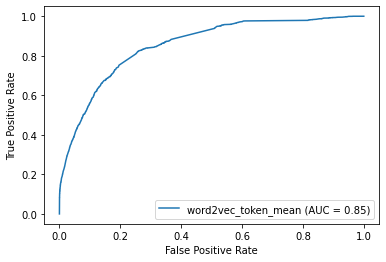

In [40]:
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='word2vec_token_mean')
display.plot()  

In [22]:
# Experiment settings
# 16 feature_dim
# 16 hidden layer
# 2 log_softmax

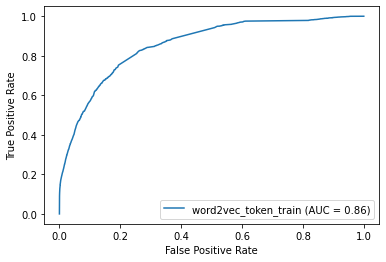

In [41]:
fpr, tpr, thresholds = metrics.roc_curve(tmp_y['train_mask'], [x[1] for x in logit_pred['train_mask']])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='word2vec_token_train')
display.plot()  

In [248]:
import pickle
with open("logit_pred.pkl", "wb") as writer:
    pickle.dump(all_data, writer)

In [43]:
y_actu = pd.Series(tmp_y['train_mask'], name='actual')
y_pred = pd.Series(tmp_pred['train_mask'], name='pred')
df_confusion = pd.crosstab(y_actu, y_pred)


In [44]:
df_confusion

pred,0,1
actual,,
0,143702,1807
1,14247,4087


In [126]:
y_actu = pd.Series(tmp_y['test_mask'], name='actual')
y_pred = pd.Series(tmp_pred['test_mask'], name='pred')
df_confusion = pd.crosstab(y_actu, y_pred)


In [127]:
df_confusion

pred,0,1
actual,,
0,41031,520
1,4067,1122


In [104]:
len(tmp_index['test_mask'])

46740

In [105]:
len(tmp_y['test_mask'])

46740

In [251]:
false_positive_cases = []
false_negative_cases = []
for i in range(len(tmp_y['test_mask'])):
    if tmp_y['test_mask'][i] != tmp_pred['test_mask'][i]:
        if tmp_pred['test_mask'][i] == 1:
            false_positive_cases.append(tmp_index['test_mask'][i])
        elif tmp_pred['test_mask'][i] == 0:
            false_negative_cases.append(tmp_index['test_mask'][i])
        print(i, tmp_y['test_mask'][i], tmp_pred['test_mask'][i], logit_pred['test_mask'][i], tmp_index['test_mask'][i])

13 1 0 [-0.2029852420091629, -1.6943985223770142] 72
14 1 0 [-0.09706569463014603, -2.380507707595825] 78
21 1 0 [-0.25747746229171753, -1.4828011989593506] 124
26 1 0 [-0.11105132848024368, -2.252774477005005] 162
29 1 0 [-0.385833740234375, -1.1390703916549683] 175
32 1 0 [-0.24518394470214844, -1.5258349180221558] 181
33 1 0 [-0.24518394470214844, -1.5258349180221558] 182
41 1 0 [-0.11076731234788895, -2.2551960945129395] 205
42 1 0 [-0.32080888748168945, -1.2930296659469604] 209
49 1 0 [-0.11076731234788895, -2.2551960945129395] 263
63 1 0 [-0.07071547210216522, -2.684239387512207] 359
70 1 0 [-0.14134222269058228, -2.0264103412628174] 396
98 1 0 [-0.20181742310523987, -1.6996039152145386] 558
101 1 0 [-0.14169920980930328, -2.024061918258667] 584
102 1 0 [-0.2005547136068344, -1.7052704095840454] 593
121 0 1 [-1.0767513513565063, -0.4165774881839752] 717
130 1 0 [-0.5635114312171936, -0.8421271443367004] 765
146 1 0 [-0.07071547210216522, -2.684239387512207] 840
158 1 0 [-0.408469

1776 1 0 [-0.4144618511199951, -1.0808579921722412] 8615
1779 1 0 [-0.11076731234788895, -2.2551960945129395] 8627
1785 1 0 [-0.3567964732646942, -1.203689455986023] 8637
1788 1 0 [-0.5363354682922363, -0.8792060613632202] 8651
1813 0 1 [-1.5654995441436768, -0.23443657159805298] 8779
1828 1 0 [-0.2315918356180191, -1.576340675354004] 8854
1835 0 1 [-0.7382910251617432, -0.6499536037445068] 8882
1838 1 0 [-0.4104465842247009, -1.0887231826782227] 8913
1841 0 1 [-0.7470563054084778, -0.6419962048530579] 8927
1852 0 1 [-0.9134058952331543, -0.5127534866333008] 8962
1855 1 0 [-0.11076731234788895, -2.2551960945129395] 8981
1875 0 1 [-0.9080387353897095, -0.5163650512695312] 9084
1876 1 0 [-0.4001511335372925, -1.109325647354126] 9092
1881 1 0 [-0.2315918356180191, -1.576340675354004] 9102
1882 1 0 [-0.3810044825077057, -1.1494050025939941] 9103
1885 1 0 [-0.21009066700935364, -1.6634231805801392] 9140
1886 1 0 [-0.21688853204250336, -1.6348568201065063] 9144
1911 1 0 [-0.3028367757797241,

3228 1 0 [-0.22400492429733276, -1.6059997081756592] 15896
3229 1 0 [-0.2367754876613617, -1.556695580482483] 15900
3234 1 0 [-0.07071547210216522, -2.684239387512207] 15917
3236 1 0 [-0.20477810502052307, -1.6864705085754395] 15926
3238 1 0 [-0.31592702865600586, -1.3060522079467773] 15930
3242 1 0 [-0.4104465842247009, -1.0887231826782227] 15945
3259 1 0 [-0.4144618511199951, -1.0808579921722412] 16012
3265 1 0 [-0.2899157702922821, -1.3796229362487793] 16036
3274 1 0 [-0.11076731234788895, -2.2551960945129395] 16071
3280 1 0 [-0.2930881977081299, -1.3702491521835327] 16111
3283 1 0 [-0.0812678337097168, -2.5503640174865723] 16153
3284 1 0 [-0.2769736647605896, -1.4191253185272217] 16156
3287 1 0 [-0.3976057469844818, -1.1145188808441162] 16166
3288 1 0 [-0.3976057469844818, -1.1145188808441162] 16167
3292 1 0 [-0.07071547210216522, -2.684239387512207] 16188
3299 1 0 [-0.22001203894615173, -1.6220630407333374] 16216
3302 1 0 [-0.11076731234788895, -2.2551960945129395] 16238
3304 1 0 

5081 1 0 [-0.4104465842247009, -1.0887231826782227] 25581
5089 0 1 [-1.1767394542694092, -0.3685772716999054] 25636
5100 1 0 [-0.12829577922821045, -2.116879463195801] 25665
5110 1 0 [-0.07071547210216522, -2.684239387512207] 25724
5111 1 0 [-0.5388475060462952, -0.8756775259971619] 25739
5115 1 0 [-0.27145668864250183, -1.4366127252578735] 25768
5119 1 0 [-0.2670792043209076, -1.4507791996002197] 25788
5134 1 0 [-0.19684214890003204, -1.7221604585647583] 25892
5143 1 0 [-0.13214348256587982, -2.0892107486724854] 25930
5151 1 0 [-0.38193899393081665, -1.1473932266235352] 25968
5153 0 1 [-0.7686566710472107, -0.6229411959648132] 25977
5154 1 0 [-0.07071547210216522, -2.684239387512207] 25980
5160 0 1 [-0.7022064924240112, -0.6841691732406616] 26019
5169 1 0 [-0.3120221495628357, -1.316638708114624] 26045
5171 1 0 [-0.21052846312522888, -1.661552906036377] 26058
5173 1 0 [-0.4719315469264984, -0.9776244163513184] 26069
5174 1 0 [-0.07071547210216522, -2.684239387512207] 26072
5175 1 0 [-

6444 1 0 [-0.07250044494867325, -2.660194158554077] 32591
6453 1 0 [-0.5919710993766785, -0.8057242035865784] 32657
6459 1 0 [-0.1096477210521698, -2.264805793762207] 32681
6468 1 0 [-0.5791005492210388, -0.8218950629234314] 32725
6472 1 0 [-0.1096477210521698, -2.264805793762207] 32758
6477 1 0 [-0.43038061261177063, -1.050569772720337] 32778
6478 1 0 [-0.40113040804862976, -1.107338547706604] 32780
6479 0 1 [-0.6946591734886169, -0.6916374564170837] 32783
6484 1 0 [-0.11076731234788895, -2.2551960945129395] 32809
6490 1 0 [-0.1096477210521698, -2.264805793762207] 32829
6498 1 0 [-0.23668573796749115, -1.5570317506790161] 32853
6499 1 0 [-0.5222630500793457, -0.8993762731552124] 32854
6515 1 0 [-0.5164587497711182, -0.9079000949859619] 32921
6516 1 0 [-0.5388475060462952, -0.8756775259971619] 32924
6519 1 0 [-0.30519819259643555, -1.3355149030685425] 32935
6521 1 0 [-0.0871967226266861, -2.482870101928711] 32959
6527 1 0 [-0.15069828927516937, -1.9668785333633423] 32984
6528 1 0 [-0.1

7537 1 0 [-0.49703094363212585, -0.9373462200164795] 38101
7538 1 0 [-0.5078175067901611, -0.920819878578186] 38103
7544 0 1 [-0.7020567655563354, -0.6843162775039673] 38127
7547 1 0 [-0.07071547210216522, -2.684239387512207] 38143
7549 1 0 [-0.13596855103969574, -2.0625462532043457] 38149
7552 1 0 [-0.1735551804304123, -1.8367822170257568] 38168
7554 1 0 [-0.3120221495628357, -1.316638708114624] 38179
7556 1 0 [-0.38411954045295715, -1.1427208185195923] 38199
7557 1 0 [-0.3918270170688629, -1.1264595985412598] 38216
7583 1 0 [-0.3120221495628357, -1.316638708114624] 38377
7585 0 1 [-1.631122350692749, -0.21779508888721466] 38409
7598 1 0 [-0.6338843107223511, -0.756144642829895] 38457
7604 1 0 [-0.5039169788360596, -0.9267439842224121] 38491
7605 1 0 [-0.17079192399978638, -1.8514900207519531] 38492
7607 1 0 [-0.4359264671802521, -1.0403393507003784] 38507
7608 1 0 [-0.11076731234788895, -2.2551960945129395] 38518
7609 1 0 [-0.1919516921043396, -1.74495267868042] 38523
7616 1 0 [-0.53

8739 1 0 [-0.38193899393081665, -1.1473932266235352] 44339
8742 1 0 [-0.07071547210216522, -2.684239387512207] 44347
8744 1 0 [-0.07071547210216522, -2.684239387512207] 44356
8759 1 0 [-0.5388475060462952, -0.8756775259971619] 44421
8772 0 1 [-1.7010462284088135, -0.2014952003955841] 44498
8774 1 0 [-0.632442831993103, -0.757776141166687] 44503
8785 0 1 [-0.6931802034378052, -0.693114161491394] 44586
8788 1 0 [-0.3120221495628357, -1.316638708114624] 44593
8797 1 0 [-0.50709468126297, -0.9219133257865906] 44637
8799 0 1 [-3.0651895999908447, -0.047767914831638336] 44640
8800 0 1 [-1.10064697265625, -0.4044494032859802] 44641
8803 0 1 [-1.8198221921920776, -0.17680230736732483] 44653
8824 1 0 [-0.37848660349845886, -1.1548563241958618] 44762
8833 1 0 [-0.11076731234788895, -2.2551960945129395] 44809
8847 1 0 [-0.11076731234788895, -2.2551960945129395] 44854
8852 1 0 [-0.5164587497711182, -0.9079000949859619] 44880
8853 1 0 [-0.5388475060462952, -0.8756775259971619] 44882
8855 0 1 [-1.30

10772 1 0 [-0.26835203170776367, -1.446632742881775] 54267
10780 1 0 [-0.584007740020752, -0.8156740665435791] 54304
10787 1 0 [-0.13068123161792755, -2.099623441696167] 54336
10798 1 0 [-0.07103464007377625, -2.6798951625823975] 54373
10800 1 0 [-0.11582120507955551, -2.213059663772583] 54384
10827 1 0 [-0.19678045809268951, -1.7224438190460205] 54519
10831 0 1 [-2.681753158569336, -0.07089794427156448] 54535
10838 1 0 [-0.09845173358917236, -2.367011070251465] 54582
10851 1 0 [-0.06462015211582184, -2.771365165710449] 54622
10869 1 0 [-0.5057377815246582, -0.9239712953567505] 54745
10874 1 0 [-0.07558824121952057, -2.6200103759765625] 54755
10882 1 0 [-0.05527954548597336, -2.9228644371032715] 54787
10888 1 0 [-0.11132428795099258, -2.250453472137451] 54806
10890 1 0 [-0.40805065631866455, -1.0934611558914185] 54823
10906 1 0 [-0.09139040857553482, -2.437962293624878] 54890
10907 1 0 [-0.1624043583869934, -1.8977694511413574] 54895
10909 1 0 [-0.11888201534748077, -2.1884758472442627

13066 1 0 [-0.09072956442832947, -2.4448931217193604] 65634
13080 1 0 [-0.30992019176483154, -1.322401523590088] 65708
13081 1 0 [-0.578292191028595, -0.8229264616966248] 65710
13089 1 0 [-0.10922864824533463, -2.2684288024902344] 65767
13091 1 0 [-0.11132428795099258, -2.250453472137451] 65771
13107 1 0 [-0.5826981663703918, -0.8173274397850037] 65856
13108 1 0 [-0.19013230502605438, -1.753595232963562] 65859
13114 1 0 [-0.2385064959526062, -1.5502426624298096] 65881
13121 1 0 [-0.11076731234788895, -2.2551960945129395] 65911
13122 1 0 [-0.32769930362701416, -1.275038242340088] 65912
13132 1 0 [-0.2930881977081299, -1.3702491521835327] 65936
13136 1 0 [-0.10716909915208817, -2.2864537239074707] 65972
13150 1 0 [-0.11947257816791534, -2.183809757232666] 66025
13151 1 0 [-0.1751919686794281, -1.8281902074813843] 66029
13168 1 0 [-0.11133601516485214, -2.250354051589966] 66143
13170 1 0 [-0.17163610458374023, -1.846969485282898] 66151
13201 1 0 [-0.11498305201530457, -2.219911575317383] 

14741 0 1 [-1.0407737493515015, -0.4356893002986908] 74283
14748 1 0 [-0.33539295196533203, -1.255466341972351] 74311
14751 1 0 [-0.27354711294174194, -1.4299390316009521] 74324
14754 1 0 [-0.04745715111494064, -3.0715622901916504] 74336
14764 1 0 [-0.1331385374069214, -2.08219575881958] 74389
14769 1 0 [-0.23789474368095398, -1.5525175333023071] 74414
14802 0 1 [-0.8029124140739441, -0.5942475199699402] 74581
14810 0 1 [-0.8974079489707947, -0.5236151814460754] 74653
14818 1 0 [-0.11133601516485214, -2.250354051589966] 74680
14821 1 0 [-0.08530285209417343, -2.5038952827453613] 74687
14828 1 0 [-0.1735551804304123, -1.8367822170257568] 74732
14830 1 0 [-0.05527954548597336, -2.9228644371032715] 74748
14831 1 0 [-0.09105350822210312, -2.4414892196655273] 74761
14839 1 0 [-0.17855195701122284, -1.8108235597610474] 74795
14841 0 1 [-1.309029221534729, -0.3148232698440552] 74820
14855 1 0 [-0.12731803953647614, -2.1240503787994385] 74901
14862 1 0 [-0.13813073933124542, -2.047824859619140

17085 1 0 [-0.11076731234788895, -2.2551960945129395] 86066
17090 1 0 [-0.16995154321193695, -1.8560142517089844] 86087
17091 1 0 [-0.13244196772575378, -2.0871007442474365] 86100
17101 1 0 [-0.12408767640590668, -2.1481690406799316] 86137
17103 1 0 [-0.10302022844552994, -2.3238980770111084] 86142
17109 1 0 [-0.17163610458374023, -1.8469693660736084] 86186
17123 1 0 [-0.5898723006248474, -0.8083292841911316] 86227
17129 1 0 [-0.36404791474342346, -1.1869776248931885] 86269
17130 1 0 [-0.2969226837158203, -1.3590742349624634] 86270
17145 1 0 [-0.5012529492378235, -0.9308238625526428] 86309
17158 0 1 [-1.326216220855713, -0.30853793025016785] 86406
17159 0 1 [-1.326216220855713, -0.30853793025016785] 86407
17168 1 0 [-0.27762338519096375, -1.4170923233032227] 86476
17188 0 1 [-0.8580659627914429, -0.5516151189804077] 86591
17192 1 0 [-0.07035020738840103, -2.689239025115967] 86619
17201 1 0 [-0.07071547210216522, -2.684239387512207] 86657
17209 1 0 [-0.07035020738840103, -2.689239025115

19137 0 1 [-1.627409815788269, -0.21870054304599762] 96293
19151 1 0 [-0.1871521919965744, -1.7679505348205566] 96358
19157 1 0 [-0.11133601516485214, -2.250354051589966] 96393
19193 1 0 [-0.12594130635261536, -2.134249448776245] 96600
19214 1 0 [-0.18435414135456085, -1.7816582918167114] 96696
19215 1 0 [-0.18435414135456085, -1.7816582918167114] 96697
19231 1 0 [-0.1070428267121315, -2.2875704765319824] 96789
19232 1 0 [-0.16251441836357117, -1.8971452713012695] 96792
19242 1 0 [-0.08461092412471771, -2.511699676513672] 96822
19244 0 1 [-1.1484925746917725, -0.38142797350883484] 96825
19246 1 0 [-0.28274837136268616, -1.4012432098388672] 96838
19248 1 0 [-0.21306832134723663, -1.6507856845855713] 96850
19249 1 0 [-0.07090049982070923, -2.6817190647125244] 96851
19254 1 0 [-0.11076731234788895, -2.2551960945129395] 96875
19266 1 0 [-0.2585984766483307, -1.4789929389953613] 96941
19272 1 0 [-0.09225030243396759, -2.429020404815674] 96973
19287 0 1 [-1.20913565158844, -0.354470402002334

21237 1 0 [-0.01422632671892643, -4.259765625] 107259
21241 1 0 [-0.20029334723949432, -1.706447958946228] 107286
21253 1 0 [-0.13244196772575378, -2.0871007442474365] 107356
21280 1 0 [-0.07071547210216522, -2.684239387512207] 107467
21304 1 0 [-0.11076731234788895, -2.2551960945129395] 107571
21311 1 0 [-0.19094781577587128, -1.749710202217102] 107595
21319 1 0 [-0.07512500882148743, -2.625929594039917] 107613
21327 0 1 [-0.7016125321388245, -0.684752881526947] 107657
21333 1 0 [-0.17471060156822205, -1.8307085037231445] 107694
21335 1 0 [-0.2238374948501587, -1.6066668033599854] 107700
21347 1 0 [-0.19684214890003204, -1.7221604585647583] 107770
21349 0 1 [-0.9307636618614197, -0.5012920498847961] 107773
21360 0 1 [-1.7171591520309448, -0.19793352484703064] 107815
21372 1 0 [-0.18726231157779694, -1.7674152851104736] 107873
21404 1 0 [-0.3598364293575287, -1.1966345310211182] 107999
21413 1 0 [-0.6472463011741638, -0.7412566542625427] 108039
21418 1 0 [-0.3735770285129547, -1.165611

23937 1 0 [-0.13244196772575378, -2.0871007442474365] 120344
23942 1 0 [-0.18451769649982452, -1.7808506488800049] 120372
23948 1 0 [-0.07071547210216522, -2.684239387512207] 120416
23962 0 1 [-0.8685479760169983, -0.543969452381134] 120474
24002 1 0 [-0.1296696960926056, -2.1068992614746094] 120680
24008 1 0 [-0.5218096971511841, -0.9000376462936401] 120720
24018 1 0 [-0.07090049982070923, -2.6817190647125244] 120767
24055 1 0 [-0.20477810502052307, -1.6864705085754395] 120957
24064 1 0 [-0.5009862780570984, -0.9312337040901184] 121004
24066 1 0 [-0.11076731234788895, -2.2551960945129395] 121007
24068 1 0 [-0.1724914163351059, -1.8424139022827148] 121027
24083 1 0 [-0.5388475060462952, -0.8756775259971619] 121092
24115 0 1 [-0.7522342205047607, -0.6373574733734131] 121261
24119 1 0 [-0.17079192399978638, -1.8514900207519531] 121279
24120 1 0 [-0.11076731234788895, -2.2551960945129395] 121282
24134 1 0 [-0.2148706316947937, -1.6432316303253174] 121341
24184 1 0 [-0.21281859278678894, -

27219 1 0 [-0.4001511335372925, -1.109325647354126] 136681
27223 1 0 [-0.3810044825077057, -1.1494050025939941] 136702
27227 1 0 [-0.36776816844940186, -1.1785573959350586] 136727
27229 1 0 [-0.5489131212234497, -0.8617485761642456] 136729
27230 1 0 [-0.2961183488368988, -1.3614041805267334] 136740
27234 1 0 [-0.21084344387054443, -1.6602095365524292] 136759
27235 1 0 [-0.21009066700935364, -1.6634231805801392] 136767
27237 1 0 [-0.21009066700935364, -1.6634231805801392] 136770
27240 1 0 [-0.40334489941596985, -1.1028660535812378] 136781
27241 1 0 [-0.11076731234788895, -2.2551960945129395] 136787
27245 1 0 [-0.25936639308929443, -1.4763953685760498] 136815
27271 1 0 [-0.3105871379375458, -1.3205684423446655] 136898
27281 1 0 [-0.11105132848024368, -2.252774477005005] 136933
27283 1 0 [-0.3028367757797241, -1.3421614170074463] 136947
27300 1 0 [-0.38077235221862793, -1.149906039237976] 137016
27323 1 0 [-0.17908938229084015, -1.8080790042877197] 137123
27333 1 0 [-0.31543469429016113, 

30137 1 0 [-0.24847841262817383, -1.51406729221344] 151338
30572 1 0 [-0.41178953647613525, -1.0860822200775146] 153400
30599 1 0 [-0.11724936217069626, -2.2015044689178467] 153537
30616 1 0 [-0.6362699270248413, -0.753455638885498] 153616
30621 1 0 [-0.11076731234788895, -2.2551960945129395] 153637
30627 1 0 [-0.38193899393081665, -1.1473932266235352] 153657
30633 1 0 [-0.13814963400363922, -2.0476973056793213] 153689
30643 1 0 [-0.07071547210216522, -2.684239387512207] 153733
30660 1 0 [-0.14423583447933197, -2.0075571537017822] 153814
30661 1 0 [-0.1667717695236206, -1.873356580734253] 153817
30673 1 0 [-0.40334489941596985, -1.1028660535812378] 153887
30677 1 0 [-0.11459725350141525, -2.223083019256592] 153901
30679 1 0 [-0.39463797211647034, -1.1206247806549072] 153908
30722 1 0 [-0.15401014685630798, -1.9467538595199585] 154086
30734 1 0 [-0.07071547210216522, -2.684239387512207] 154161
30739 1 0 [-0.17163610458374023, -1.846969485282898] 154179
30757 1 0 [-0.2961183488368988, -1

32666 1 0 [-0.1574057787656784, -1.926599144935608] 163869
32667 1 0 [-0.06896602362394333, -2.708425998687744] 163879
32673 1 0 [-0.3079134225845337, -1.3279460668563843] 163894
32688 1 0 [-0.2777368128299713, -1.4167377948760986] 163987
32699 1 0 [-0.07090049982070923, -2.6817190647125244] 164062
32729 1 0 [-0.3810044825077057, -1.1494050025939941] 164230
32754 1 0 [-0.13814963400363922, -2.0476973056793213] 164382
32771 1 0 [-0.1724914163351059, -1.8424139022827148] 164447
32778 1 0 [-0.5816689729690552, -0.8186303377151489] 164466
32796 1 0 [-0.2961183488368988, -1.3614041805267334] 164545
32803 1 0 [-0.3976057469844818, -1.1145188808441162] 164569
32807 1 0 [-0.17661899328231812, -1.8207707405090332] 164582
32816 1 0 [-0.5584152936935425, -0.8489007949829102] 164618
32820 0 1 [-1.3226757049560547, -0.30982068181037903] 164642
32836 1 0 [-0.17498724162578583, -1.8292605876922607] 164696
32852 1 0 [-0.1218712255358696, -2.165107488632202] 164763
32869 1 0 [-0.20377342402935028, -1.6

39937 0 1 [-0.7378125190734863, -0.6503918170928955] 200456
39938 0 1 [-0.7378125190734863, -0.6503918170928955] 200457
39947 1 0 [-0.11498305201530457, -2.219911575317383] 200492
39951 0 1 [-1.8563728332519531, -0.16988515853881836] 200523
39979 1 0 [-0.37895065546035767, -1.15384840965271] 200654
39994 1 0 [-0.16911499202251434, -1.8605422973632812] 200699
40011 1 0 [-0.11105132848024368, -2.252774477005005] 200778
40012 1 0 [-0.13931649923324585, -2.0398566722869873] 200785
40015 1 0 [-0.11076731234788895, -2.2551960945129395] 200795
40038 1 0 [-0.07071547210216522, -2.684239387512207] 200901
40045 1 0 [-0.12844529747962952, -2.1157872676849365] 200926
40046 1 0 [-0.21385928988456726, -1.6474617719650269] 200934
40070 1 0 [-0.06546864658594131, -2.758740186691284] 201066
40079 1 0 [-0.24744512140750885, -1.517738938331604] 201157
40106 1 0 [-0.17450496554374695, -1.8317862749099731] 201281
40107 1 0 [-0.17450496554374695, -1.8317862749099731] 201288
40116 1 0 [-0.10955360531806946, 

43941 1 0 [-0.4001511335372925, -1.109325647354126] 220019
43955 1 0 [-0.029942717403173447, -3.5234038829803467] 220106
43956 1 0 [-0.003024767152965069, -5.802452564239502] 220111
43959 1 0 [-0.009830278344452381, -4.627198219299316] 220123
43964 1 0 [-0.6484227180480957, -0.7399659156799316] 220155
43985 1 0 [-0.5755728483200073, -0.826410174369812] 220259
43987 1 0 [-0.6270822286605835, -0.7638872861862183] 220267
43997 1 0 [-0.13020694255828857, -2.103027820587158] 220327
44014 0 1 [-1.3368293046951294, -0.30472955107688904] 220417
44015 1 0 [-0.27974388003349304, -1.4104942083358765] 220419
44018 1 0 [-0.35903388261795044, -1.1984903812408447] 220427
44020 1 0 [-0.13679179549217224, -2.0569114685058594] 220436
44029 1 0 [-0.11076731234788895, -2.2551960945129395] 220465
44038 1 0 [-0.15777195990085602, -1.9244537353515625] 220502
44040 1 0 [-0.15777195990085602, -1.9244537353515625] 220505
44053 0 1 [-0.6931802034378052, -0.693114161491394] 220576
44061 1 0 [-0.44959795475006104,

46029 1 0 [-0.5078175067901611, -0.920819878578186] 230300
46034 1 0 [-0.22059266269207, -1.6197071075439453] 230321
46039 1 0 [-0.4222913086414337, -1.0657860040664673] 230334
46044 1 0 [-0.50709468126297, -0.9219133257865906] 230377
46045 0 1 [-1.10064697265625, -0.4044494032859802] 230383
46052 1 0 [-0.07071547210216522, -2.684239387512207] 230414
46056 1 0 [-0.5584152936935425, -0.8489007949829102] 230444
46062 1 0 [-0.1724914163351059, -1.8424139022827148] 230472
46068 0 1 [-1.5047080516815186, -0.25113433599472046] 230503
46099 1 0 [-0.0712200477719307, -2.6773788928985596] 230698
46105 1 0 [-0.17952540516853333, -1.805858850479126] 230722
46111 1 0 [-0.11076731234788895, -2.2551960945129395] 230755
46129 1 0 [-0.285866916179657, -1.3917596340179443] 230867
46134 0 1 [-1.8214839696884155, -0.1764812022447586] 230940
46135 0 1 [-1.8214839696884155, -0.1764812022447586] 230942
46137 0 1 [-1.3074852228164673, -0.31539520621299744] 230948
46161 0 1 [-1.3901877403259277, -0.2863876223

In [198]:
logit_pred['test_mask'][601]

[-0.11076731234788895, -2.2551960945129395]

In [252]:
len(false_positive_cases)

520

In [253]:
len(false_negative_cases)

4067

In [254]:
import random 
random.sample(false_positive_cases, 20)

[48430,
 161779,
 93479,
 155494,
 24481,
 231100,
 68047,
 54535,
 89222,
 226202,
 75439,
 107657,
 189600,
 192195,
 35651,
 55950,
 48132,
 46197,
 19776,
 73134]

In [255]:
random.sample(false_negative_cases, 20)

[177251,
 28008,
 233041,
 8331,
 63590,
 163706,
 224447,
 3364,
 33216,
 109171,
 50785,
 96851,
 43230,
 26136,
 22817,
 36025,
 4609,
 144902,
 54806,
 28012]